##                          DATA DISCOVERY AND VISUALISATION - Assignment 2
### S10241900K Cheryl Neo Yuqian

#### Contents

#### 1. [Project Objectives](#part1)
   - [1.1 Primary business/research questions](#part1.1)  
   
#### 2. [Data Preparation](#part2)
   - [2.1 State of Data](#part2.1)  
   - [2.2 Data Overview](#part2.2)
   - [2.3 Data Cleaning and Filling](#part2.3)
   - [2.4 Data Exploration](#part2.4)
   
#### 3. [Visualisations](#part3)
   - [3.1 Visual 1](#part3.1)  
   - [3.2 Visual 2](#part3.2)
   - [3.3 Visual 3](#part3.3)
   - [3.4 Visual 4](#part3.4)


#### 4. [Dashboards](#part4)
   - [4.1 Dashboard 1](#part4.1)  
   - [4.2 Dashboard 2](#part4.2)
   - [4.3 Dashboard 3](#part4.3)

#### 5. [Reflection](#part5)



# 1. Project Objectives <a id="part1"></a>

### 1.2 `Questions`  <a id="part1.2"></a> 

### Overall Trends
- When was the peak market period of 2014 and 2015? (use month, have 2 line chart) - no. of travellers
- When was the peak market period of 2014 and 2015? (use month, have 2 line chart) - total amt? 
- Are travellers likely to come Singapore a second time? (compare visit to know if singapore is doing enough for ppl to crave coming to sg)
- Which Top 10 city residence do our travellers come from? (line chart/bar chart?)

### Hospitality (Preferability of Tourists)
- Which language was dominant amongst the travellers? 
- What travel type is the most popular? (package or what?)
- Are travellers likely to come Singapore a second time? (compare visit)
- What travel type is the most popular? (package or what?)
- Which terminal has the highest popularity? (sea,land,air)
- What are the top 5 main hotels travellers prefer to stay in?

### What do people come here for?
- What occupation does Singapore attract most? 
- What purpose of travel has the highest demand/popularity? (compare purpose group)
- How much are people willing to pay for each sector? (seaborn boxplot? or violin)
- are we doing enough to let tourists stay in singapore longer?

# 2. Data Preparation <a id="part2"></a>

### 2.1 `State of Data`  <a id="part2.1"></a> 

While analyzing the dataset in Excel, it was discovered that the data was not clean. There were some blanks, missing values, and inconsistencies in some data, which will cause inaccuracy when the data visualisation is made. Therefore, cleaning of the data must be done before continuing on to create visualisations and dashboards. 

### 2.2 `Data Overview`  <a id="part2.2"></a> 

### Importing Libraries

In [1]:
# Import NumPy and Pandas libraries
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
%matplotlib inline

### Overview

In [2]:
# Import dataset
# A list of missing values to ensure accurate data
missing_values = ["n/a", "na", "N.A.","NA", "Resp doesn't know", "Not applicable", "Not stated", "No stated", "Not Stated", " ", "908"]
df = pd.read_excel('mock indonesian traveller survey data.xlsx', '2014_2015Data', na_values = missing_values)

In [3]:
#Reveal data shape of df
df.shape

(8887, 35)

In [4]:
# View number of items and data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8887 entries, 0 to 8886
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   case                8887 non-null   int64         
 1   Year                8887 non-null   int64         
 2   R.mth               8887 non-null   object        
 3   date                8887 non-null   datetime64[ns]
 4   Country_residence   8887 non-null   object        
 5   City_residence      8887 non-null   object        
 6   Purpose_grp         8887 non-null   object        
 7   Purpose             8887 non-null   object        
 8   Air_Terminal        5697 non-null   object        
 9   Sea_Terminal        2828 non-null   object        
 10  Land_Terminal       355 non-null    object        
 11  langint             8887 non-null   object        
 12  1st_visit           8887 non-null   object        
 13  length_stay         8887 non-null   object      

In [5]:
# View first 5 records of the DataFrame
df.head()

,case,Year,R.mth,date,Country_residence,City_residence,Purpose_grp,Purpose,Air_Terminal,Sea_Terminal,...,totmedi_$,tototh_$,totshopping_$,MainAccomm,MainHotel,travel_companion.1,travel_companion.2,travel_companion.3,travel_companion.4,travel_companion.5
0,18,2015,January,2015-01-01,Indonesia,Yogyakarta,Leisure,Holiday/ Rest & Relax,Terminal 1,NaN,...,0.0,0.0,854.853136,Hotel,V Hotel Lavender,Spouse,Children aged 8-12 yrs,NaN,NaN,NaN
1,41,2015,January,2015-01-01,Indonesia,Batam,Leisure,Holiday/ Rest & Relax,NaN,HCC,...,0.0,0.0,171.519802,Hotel,Madras Hotel,Spouse,Children aged 0-7 yrs,Friends,NaN,NaN
2,43,2015,January,2015-01-01,Indonesia,Batam,Leisure,Holiday/ Rest & Relax,NaN,HCC,...,0.0,0.0,104.853136,Hotel,Hotel 81 - Geylang,Spouse,Children aged 8-12 yrs,NaN,NaN,NaN
3,44,2015,January,2015-01-01,Indonesia,Batam,Leisure,Others,NaN,HCC,...,0.0,0.0,220.853136,Accommodation not required - Others,NaN,Partner/ Boyfriend/ Girlfriend,Parents/ Parents-in-law,Siblings,NaN,NaN
4,45,2015,January,2015-01-01,Indonesia,Batam,Others/ Refused,"Others - Personal (e.g. weddings, funerals, etc)",NaN,HCC,...,0.0,0.0,104.853136,Hotel,Hotel 81 - Bencoolen,Parents/ Parents-in-law,Siblings,NaN,NaN,NaN


In [6]:
# Basic summary of the dataset
print(df.shape)
print(df.size)
print(df.dtypes)

(8887, 35)
311045
case                           int64
Year                           int64
R.mth                         object
date                  datetime64[ns]
Country_residence             object
City_residence                object
Purpose_grp                   object
Purpose                       object
Air_Terminal                  object
Sea_Terminal                  object
Land_Terminal                 object
langint                       object
1st_visit                     object
length_stay                   object
travel_type                   object
f1_gender                     object
f3_occupation                 object
f4_industry                   object
f5_designation                object
f5_designation.oth            object
totacc_$                     float64
totfnb_$                     float64
tottran_$                    float64
totbiz_$                     float64
totedu_$                       int64
totmedi_$                    float64
tototh_$            

In [7]:
#to check for missing data
df.describe(include = 'all')

C:\Users\chery\AppData\Local\Temp\ipykernel_38824\883701615.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include = 'all')


,case,Year,R.mth,date,Country_residence,City_residence,Purpose_grp,Purpose,Air_Terminal,Sea_Terminal,...,totmedi_$,tototh_$,totshopping_$,MainAccomm,MainHotel,travel_companion.1,travel_companion.2,travel_companion.3,travel_companion.4,travel_companion.5
count,8887.000000,8887.000000,8887,8887,8887,8887,8887,8887,5697,2828,...,8887.000000,8887.000000,8.887000e+03,8854,4266,8887,1632,490,94,17
unique,NaN,NaN,12,587,1,59,5,40,3,3,...,NaN,NaN,NaN,13,287,15,14,13,8,6
top,NaN,NaN,March,2015-07-31 00:00:00,Indonesia,Jakarta,Leisure,Holiday/ Rest & Relax,Terminal 1,HCC,...,NaN,NaN,NaN,Hotel,Mandarin Orchard Singapore,Alone,Siblings,Children aged 8-12 yrs,Siblings,Other relatives
freq,NaN,NaN,812,61,8887,3867,5655,3244,3642,2536,...,NaN,NaN,NaN,4296,358,2883,467,101,24,8
first,NaN,NaN,NaN,2014-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2015-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,11521.140880,2014.503545,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,216.271980,0.568938,3.155676e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,6615.259259,0.500016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2234.957037,7.632622,2.735708e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,15.000000,2014.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,8.086393e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,5623.500000,2014.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,1.018482e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 2.3 `Data Cleaning and Filling`  <a id="part2.3"></a> 

In [8]:
# Check for null values in each column
df.isnull().any()

case                  False
Year                  False
R.mth                 False
date                  False
Country_residence     False
City_residence        False
Purpose_grp           False
Purpose               False
Air_Terminal           True
Sea_Terminal           True
Land_Terminal          True
langint               False
1st_visit             False
length_stay           False
travel_type           False
f1_gender             False
f3_occupation         False
f4_industry            True
f5_designation         True
f5_designation.oth     True
totacc_$              False
totfnb_$              False
tottran_$             False
totbiz_$              False
totedu_$              False
totmedi_$             False
tototh_$              False
totshopping_$         False
MainAccomm             True
MainHotel              True
travel_companion.1    False
travel_companion.2     True
travel_companion.3     True
travel_companion.4     True
travel_companion.5     True
dtype: bool

### Replacing Values

In [9]:
# Convert all columns naming to lowercase and replace spaces,dots with underscores
df.columns = [x.lower().replace(' ','_') for x in df.columns]

In [10]:
#Converting integer to float
df['totedu_$'] = df['totedu_$'].astype(float)

In [11]:
#Check that totedu column datatype is changed to float and if all column names are uniform
print(df.dtypes)

case                           int64
year                           int64
r.mth                         object
date                  datetime64[ns]
country_residence             object
city_residence                object
purpose_grp                   object
purpose                       object
air_terminal                  object
sea_terminal                  object
land_terminal                 object
langint                       object
1st_visit                     object
length_stay                   object
travel_type                   object
f1_gender                     object
f3_occupation                 object
f4_industry                   object
f5_designation                object
f5_designation.oth            object
totacc_$                     float64
totfnb_$                     float64
tottran_$                    float64
totbiz_$                     float64
totedu_$                     float64
totmedi_$                    float64
tototh_$                     float64
t

In [12]:
# check for missing values in df
df.isnull().sum()

case                     0
year                     0
r.mth                    0
date                     0
country_residence        0
city_residence           0
purpose_grp              0
purpose                  0
air_terminal          3190
sea_terminal          6059
land_terminal         8532
langint                  0
1st_visit                0
length_stay              0
travel_type              0
f1_gender                0
f3_occupation            0
f4_industry           2844
f5_designation        3096
f5_designation.oth    6650
totacc_$                 0
totfnb_$                 0
tottran_$                0
totbiz_$                 0
totedu_$                 0
totmedi_$                0
tototh_$                 0
totshopping_$            0
mainaccomm              33
mainhotel             4621
travel_companion.1       0
travel_companion.2    7255
travel_companion.3    8397
travel_companion.4    8793
travel_companion.5    8870
dtype: int64

In [13]:
# Fill the empty cells with 'NA'
df['mainhotel'].fillna('NA', inplace = True)
df['mainaccomm'].fillna('NA', inplace = True)
df['f5_designation.oth'].fillna('NA', inplace = True)
df['f5_designation'].fillna('NA', inplace = True)
df['f4_industry'].fillna('NA', inplace = True)
df['land_terminal'].fillna('NA', inplace = True)
df['sea_terminal'].fillna('NA', inplace = True)
df['air_terminal'].fillna('NA', inplace = True)
df['travel_companion.5'].fillna('NA', inplace = True)
df['travel_companion.4'].fillna('NA', inplace = True)
df['travel_companion.3'].fillna('NA', inplace = True)
df['travel_companion.2'].fillna('NA', inplace = True)

In [14]:
# check for missing values in df
df.isnull().sum()

case                  0
year                  0
r.mth                 0
date                  0
country_residence     0
city_residence        0
purpose_grp           0
purpose               0
air_terminal          0
sea_terminal          0
land_terminal         0
langint               0
1st_visit             0
length_stay           0
travel_type           0
f1_gender             0
f3_occupation         0
f4_industry           0
f5_designation        0
f5_designation.oth    0
totacc_$              0
totfnb_$              0
tottran_$             0
totbiz_$              0
totedu_$              0
totmedi_$             0
tototh_$              0
totshopping_$         0
mainaccomm            0
mainhotel             0
travel_companion.1    0
travel_companion.2    0
travel_companion.3    0
travel_companion.4    0
travel_companion.5    0
dtype: int64

In [15]:
# Check for null values in each column
df.isnull().any()

case                  False
year                  False
r.mth                 False
date                  False
country_residence     False
city_residence        False
purpose_grp           False
purpose               False
air_terminal          False
sea_terminal          False
land_terminal         False
langint               False
1st_visit             False
length_stay           False
travel_type           False
f1_gender             False
f3_occupation         False
f4_industry           False
f5_designation        False
f5_designation.oth    False
totacc_$              False
totfnb_$              False
tottran_$             False
totbiz_$              False
totedu_$              False
totmedi_$             False
tototh_$              False
totshopping_$         False
mainaccomm            False
mainhotel             False
travel_companion.1    False
travel_companion.2    False
travel_companion.3    False
travel_companion.4    False
travel_companion.5    False
dtype: bool

### Feature Engineering 
###### Grouping Similar / Same values

In [16]:
pd.set_option("display.max_rows", None)

In [17]:
#Grouping days in groups of 29
l_stay = {'1 day':'< 1 month', '2 days':'< 1 month', '3 days':'< 1 month', 
         '4 days':'< 1 month', '5 days':'< 1 month', '6 days':'< 1 month', '7 days':'< 1 month', 
          '8-10 days':'< 1 month', '11-14 days':'< 1 month', '15-29 days': '< 1 month', '30-59 days':'>= 1 month',
          '60 days & over':'>= 1 month'
         }

#update
df.replace({'length_stay': l_stay}, inplace = True)

In [18]:
p = {'Mager (CEO, company director, senior mager)':'Manager', 
     'Professiols (doctor, lawyer, lecturer, etc)': 'Professionals',
     'Homemaker (Full time)': 'Homemaker', 'Executive (sales, administration)':'Executive', 
     'Other White collar (Teacher, Nurse, secretary, receptionist, cashier etc)':'Other White Collar', 'Others (specify)':'Others',
     'Blue collar (technician, hairdresser, hawker, taxi drivers etc)':'Blue Collar',
     'Businessman (large company, > 250 people)':'Businessman(>250 ppl)', 'Businessman (medium size company, 50 -250 people)':'Businessman(50-250ppl)',
     'Businessman (small company, <50 people)':'Businessman(<50 ppl)'
    }

#update
df.replace({'f3_occupation': p}, inplace = True)


In [19]:
h = {'Hotel 81 - Geylang':'Hotel 81', 'Hotel 81 - Bencoolen':'Hotel 81', 'Hotel 81 - Balestier':'Hotel 81',
     'Hotel 81 - Bugis':'Hotel 81', 'Hotel 81 - Princess':'Hotel 81', 'Hotel 81 - Selegie':'Hotel 81',
     'Hotel 81 - Classic':'Hotel 81', 'Hotel 81 - Chinatown':'Hotel 81', 'Hotel 81 - Hollywood':'Hotel 81', 
     'Hotel 81 - Tristar':'Hotel 81', 'Hotel 81 - Dickson':'Hotel 81', 'Hotel 81 - Selegie':'Hotel 81', 
     'Hotel 81 - Heritage':'Hotel 81', 'Hotel 81 - Rochor':'Hotel 81', 'Hotel 81 (Not Specified)':'Hotel 81', 
     'Hotel 81 - Violet':'Hotel 81', 'Hotel 81 - Lucky':'Hotel 81', 'Hotel 81 - Palace':'Hotel 81', 
     'Hotel 81 - Gold':'Hotel 81', 'Hotel 81 - Cherry':'Hotel 81', 'Hotel 81 - Sakura':'Hotel 81', 
     'Hotel 81 - Joo Chiat':'Hotel 81', 'Hotel 81 - Lavender':'Hotel 81', 'Hotel 81 - Cosy':'Hotel 81', 
     'Hotel 81 - Orchid':'Hotel 81', 'Hotel 81 - Changi':'Hotel 81', 'Hotel 81 - Osaka':'Hotel 81',
     'Hotel Clover (Not Specified)':'Hotel Clover', 'Hotel Clover 33 Jalan Sultan':'Hotel Clover',
     'Fragrance Hotel - Classic':'Fragrance Hotel', 'Fragrance Hotel - Bugis':'Fragrance Hotel', 
     'Fragrance Hotel - Crystal':'Fragrance Hotel', 'Fragrance Hotel - Riverside':'Fragrance Hotel', 
     'Fragrance Hotel - Imperial':'Fragrance Hotel', 'Fragrance Hotel - Pearl':'Fragrance Hotel', 
     'Fragrance Hotel - Sapphire':'Fragrance Hotel','Fragrance Hotel (Not Specified)':'Fragrance Hotel',
     'Fragrance Hotel - Lavender':'Fragrance Hotel', 'Fragrance Hotel - Ruby':'Fragrance Hotel', 
     'Fragrance Hotel - Emerald':'Fragrance Hotel', 'Fragrance Hotel - Royal':'Fragrance Hotel', 'Fragrance Hotel - Ocean View':'Fragrance Hotel', 
     'Fragrance Hotel - Balestier':'Fragrance Hotel', 'Fragrance Hotel - Sunflower':'Fragrance Hotel', 'Fragrance Hotel - Oasis':'Fragrance Hotel',
     'Fragrance Hotel - Rose':'Fragrance Hotel', 'Fragrance Hotel - Selegie':'Fragrance Hotel', 
     'V Hotel (Not Specified)':'V Hotel', 'V Hotel Lavender':'V Hotel', 'V Hotel Bencoolen':'V Hotel', 'Swissotel (Not Specified)':'Swissotel', 
     'Ibis Singapore (Not Specified)':'Ibis Singapore', 'Ibis Singapore on Bencoolen':'Ibis Singapore', 'Ibis Singapore Novena':'Ibis Singapore',
     'Holiday Inn Singapore (Not Specified)':'Holiday Inn Singapore', 'Holiday Inn Singapore Orchard City Centre':'Holiday Inn Singapore', 
     'Holiday Inn Express Singapore Orchard Road':'Holiday Inn Singapore', 'Holiday Inn Singapore Atrium':'Holiday Inn Singapore', 
     'Holiday Inn Express Singapore Clarke Quay':'Holiday Inn Singapore', 'Village Hotel (Not Specified)':'Village Hotel', 'Village Hotel Bugis':'Village Hotel', 
     'Village Hotel Changi':'Village Hotel', 'Village Hotel Katong':'Village Hotel', 'Village Hotel Albert Court':'Village Hotel', 
     'Parkroyal (Not Specified)':'Parkroyal', 'ParRoyal on Beach Road, Singapore':'Parkroyal', 
     'ParkRoyal on Kitchener Road':'Parkroyal', 'ParkRoyal on Pickering':'Parkroyal', 'Furama Singapore (Not Specified)':'Furma Singapore', 
     'Furama City Centre Singapore':'Furma Singapore', 'Furama Riverfront Singapore':'Furma Singapore',
     'Santa Grand (Not Specified)':'Santa Grand', 'Santa Grand Hotel Bugis':'Santa Grand', 'Santa Grand Hotel Chinatown':'Santa Grand',
     'Santa Grand Hotel East Coast':'Santa Grand', 'Santa Grand Hotel Little India':'Santa Grand',
     'Santa Grand Hotel West Coast':'Santa Grand', '5footway.inn Project (Not Specified)':'5footway.inn Project', 
     '5footway.Project Boat Quay':'5footway.inn Project', '5footway.inn Project Chinatown 3':'5footway.inn Project', 
     '5footway.inn Project Chinatown 2':'5footway.inn Project', '5footway.inn Project Bugis':'5footway.inn Project', 
     'Value Hotel (Not specified)':'Value Hotel', 'Value Hotel - Thomson':'Value Hotel', 'Value Hotel - Balestier':'Value Hotel', 
     'Aqueen Hotel - Lavender':'Aqueen Hotel', 'Aqueen Hotel - Balestier':'Aqueen Hotel', 'Hotel Royal @ Queens':'Hotel Royal', 
     'Mardas Hotel Eminence':'Mandras Hotel', 'Marrison @ Desker':'Marrison Hotel', 'Naumi Liora':'Naumi Hotel', 'Park Avenue Changi':'Park Avenue',
     'Park Avenue Rochester':'Park Avenue'
    }
#update
df.replace({'mainhotel': h}, inplace = True)

In [20]:
#Correcting errors/inconsistencies for f5_designation
df['f5_designation'].replace("Mager/ Assistant Mager","Manager/ Assistant Manager",inplace = True)
df['f5_designation'].replace("Clerk/ Secretary/ Persol Assistant","Clerk/ Secretary/ Personal Assistant",inplace = True)
df['f5_designation'].replace("General Mager","General Manager",inplace = True)

In [21]:
#Correcting errors/inconsistencies for purpose
df['purpose'].replace("Others - Personal (e.g. weddings, funerals, etc)","Others - Personal",inplace = True)
df['purpose'].replace("IR (e.g. MBS, RWS)","IR",inplace = True)
df['purpose'].replace("Others - Work Related (e.g. visa, insurance, etc)","Others - Work Related",inplace = True)
df['purpose'].replace("Gathering informations on the Education services in Singapor","Gathering informations on the Education services in Singapore",inplace = True)
df['purpose'].replace("Accompaning an international student studying in Singapore","Accompanying an international student studying in Singapore",inplace = True)

In [22]:
#Correcting errors/inconsistencies for mainaccomm
df['mainaccomm'].replace("Hostel (Rental by bed)","Hostel",inplace = True)
df['mainaccomm'].replace("Other paid accommodations (e.g.chalets, country clubs, etc)","Other paid accommodations",inplace = True)
df['mainaccomm'].replace("Other non-paid accommodations (e.g. religious places, camp,","Other non-paid accommodations",inplace = True)

### Addition of Columns

In [23]:
#Total spent of each case 
df['total_$'] = df['totacc_$'] + df['totfnb_$'] + df['tottran_$'] + df['totbiz_$'] + df['totedu_$'] + df['totmedi_$'] + df['tototh_$'] + df['totshopping_$']

### 2.4 `Data Exploration`  <a id="part2.4"></a> 

In [24]:
# View number of items and data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8887 entries, 0 to 8886
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   case                8887 non-null   int64         
 1   year                8887 non-null   int64         
 2   r.mth               8887 non-null   object        
 3   date                8887 non-null   datetime64[ns]
 4   country_residence   8887 non-null   object        
 5   city_residence      8887 non-null   object        
 6   purpose_grp         8887 non-null   object        
 7   purpose             8887 non-null   object        
 8   air_terminal        8887 non-null   object        
 9   sea_terminal        8887 non-null   object        
 10  land_terminal       8887 non-null   object        
 11  langint             8887 non-null   object        
 12  1st_visit           8887 non-null   object        
 13  length_stay         8887 non-null   object      

#### Categorical Data

In [25]:
# Filter out only categorical variables
df_cat = df.select_dtypes(['object']).copy()
df_cat.head()

,r.mth,country_residence,city_residence,purpose_grp,purpose,air_terminal,sea_terminal,land_terminal,langint,1st_visit,...,f4_industry,f5_designation,f5_designation.oth,mainaccomm,mainhotel,travel_companion.1,travel_companion.2,travel_companion.3,travel_companion.4,travel_companion.5
0,January,Indonesia,Yogyakarta,Leisure,Holiday/ Rest & Relax,Terminal 1,NA,NA,English,No,...,Marketing & Media,Director,NA,Hotel,V Hotel,Spouse,Children aged 8-12 yrs,NA,NA,NA
1,January,Indonesia,Batam,Leisure,Holiday/ Rest & Relax,NA,HCC,NA,English,No,...,Electronics & Precision Engineering,Others (specify),Engineer,Hotel,Madras Hotel,Spouse,Children aged 0-7 yrs,Friends,NA,NA
2,January,Indonesia,Batam,Leisure,Holiday/ Rest & Relax,NA,HCC,NA,English,No,...,NA,NA,NA,Hotel,Hotel 81,Spouse,Children aged 8-12 yrs,NA,NA,NA
3,January,Indonesia,Batam,Leisure,Others,NA,HCC,NA,English,No,...,Transportation and Logistics,Others (specify),Accountant,Accommodation not required - Others,NA,Partner/ Boyfriend/ Girlfriend,Parents/ Parents-in-law,Siblings,NA,NA
4,January,Indonesia,Batam,Others/ Refused,Others - Personal,NA,HCC,NA,English,No,...,NA,NA,NA,Hotel,Hotel 81,Parents/ Parents-in-law,Siblings,NA,NA,NA


In [26]:
# Count the frequency of each category in each column
for i in df_cat:
    print(i) #print the colum name first
    print(df_cat[i].value_counts()) #data value
    print('\n')

r.mth
March        812
August       792
December     787
October      757
January      745
June         741
May          737
April        728
July         724
November     692
February     691
September    681
Name: r.mth, dtype: int64


country_residence
Indonesia    8887
Name: country_residence, dtype: int64


city_residence
Jakarta                 3867
Batam                   1928
Surabaya                 746
Bandung                  563
Medan                    277
Yogyakarta               272
Tanjung Pinang           211
Bali                     189
Tanjung Balai            100
Semarang                  88
Palembang                 56
Solo                      55
Padang                    35
Kalimantan                34
Makassar                  34
Bintan                    32
Pekan Baru                30
Java                      28
Bogor                     27
Riau                      27
East Java                 21
Malang                    20
Jambi / Telanaipura       18
Suma

#### Numeric Data

In [27]:
# View five-number summary of numeric variables
df.describe()

,case,year,totacc_$,totfnb_$,tottran_$,totbiz_$,totedu_$,totmedi_$,tototh_$,totshopping_$,total_$
count,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8887.000000,8.887000e+03,8.887000e+03
mean,11521.140880,2014.503545,182.091335,88.972969,35.138836,3.388864,3.001575,216.271980,0.568938,3.155676e+03,3.685110e+03
std,6615.259259,0.500016,270.410515,140.990364,45.102560,86.199504,114.616839,2234.957037,7.632622,2.735708e+05,2.736304e+05
min,15.000000,2014.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.086393e+01,8.086393e+01
25%,5623.500000,2014.000000,0.000000,15.322785,11.361328,0.000000,0.000000,0.000000,0.000000,1.018482e+02,2.070473e+02
50%,11381.000000,2015.000000,77.870370,55.146940,23.197952,0.000000,0.000000,0.000000,0.000000,1.480251e+02,4.279709e+02
75%,17418.500000,2015.000000,275.810124,116.015031,42.670908,0.000000,0.000000,0.000000,0.000000,2.680251e+02,8.552404e+02
max,23243.000000,2015.000000,3129.199893,5802.015116,786.019694,6000.000000,9000.000000,100000.000000,350.000000,2.578999e+07,2.579524e+07


#### Correlation

In [28]:
#df.corr()

In [29]:
#graph = sns.PairGrid(df,hue="r.mth")
#graph = graph.map_diag(plt.hist)
#graph = graph.map_offdiag(plt.scatter)
#graph = graph.add_legend()
#plt.show()

# 3. Visualisations <a id="part3"></a>

### 3.1 `Overall Trends`  <a id="part3.1"></a> 

### Visual 1

In [62]:
#Creating required data for the plot
month = df['r.mth'].unique()
count = df.groupby(['year','r.mth'])['case'].count() # either this or use number with dict
count_2014 = [361, 343, 422, 379, 395, 422, 366, 403, 367, 320, 290, 344]
count_2015 = [384, 348, 390, 349, 342, 319, 358, 389, 314, 437, 402, 443]

year  r.mth    
2014  April        379
      August       403
      December     344
      February     343
      January      361
      July         366
      June         422
      March        422
      May          395
      November     290
      October      320
      September    367
2015  April        349
      August       389
      December     443
      February     348
      January      384
      July         358
      June         319
      March        390
      May          342
      November     402
      October      437
      September    314
Name: case, dtype: int64

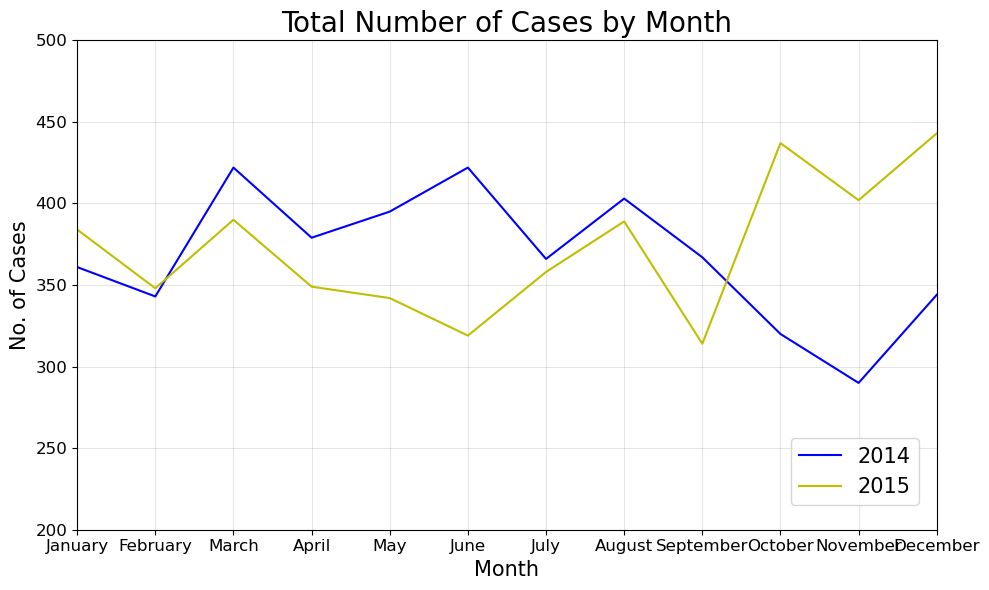

In [31]:
# When was the peak market period of 2014 and 2015? (use month, have 2 line chart) - no. of travellers
# Create a figure and subplot with 1 row and 1 column, set figure size to 10 by 5
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize=(10,6))

# Create one plot containing line charts for revenue and profits (remember to set legend labels)
ax.plot(month,count_2014, c='b', label='2014')
ax.plot(month,count_2015, c='y', label='2015') #with legend tables

# Set appropriate title for plot (set font size to 20))
ax.set_title('Total Number of Cases by Month', fontsize = 20)

# Set labels for x-axis and y-axis (set font size to 15)
ax.set_xlabel('Month', fontsize = 15)
ax.set_ylabel('No. of Cases', fontsize = 15)

# Set font size of ticks on the x-axis and y-axis to 10
ax.tick_params(labelsize=12, axis='both')

# Set appropriate ranges for the x-axis and y-axis
ax.set_xlim(left=0, right=11)
ax.set_ylim(bottom=200, top=500)

# Set grid lines to red, 0.2 transparency and dashed linestyle
ax.grid(c='k',alpha=.1, linestyle='-')

# Set appropriate appropriate position for the legend
ax.legend(loc=(0.83,0.05), borderaxespad=0, fontsize = 15)

# Set tight layout for figure
fig.tight_layout()
plt.show()

Process:
This line chart is plotted using object oriented style so that the code is more effective. In order to plot this chart, the x and y data values is created first. I used df['r.mth'].unique(), to get the months in order, starting from January. The next code, count = df.groupby(['year','r.mth'])['case'].count(), is to group year and month by the cases, to get the data required. Upon realising that 'count' variable was sorted in alphabetical order, I decided to reference from it to create a list for 2014 and 2015, to ensure that the order is correct. 
Therefore, I created a line chart to showcase the total number of cases by months. This allows me, a tourism researcher for Merlion Tour, to be able to compare the number of cases by months of each year clearly. 

Descriptive Analysis Techniques:
Overall, the pattern of the number of cases for the 2 years are about the same, which fluctuates throughout. The peak months are March/June for 2014, and October/December for 2015 (descriptive analysis).
We can also see that the obvious change is the drop in number of cases in June 2015 compared to June 2014. From this, the market research team can try to find out what was done differently during June 2015 compared to 2014 to cause the drop in number of tourists (prescriptive analysis). Additionally, this chart also shows us whether different months will affect the number of cases. However, since the 2 lines are quite similar and there is no significant change, there is no correlation between the months and number of tourists (correlation analysis). 

Findings/Insights on Visual and Questions:
This chart answers the question 'When was the peak market period of 2014 and 2015?'. From this line chart, we are able to see the peak of both years and compare them. I must be able to know what attracts tourists in order to remain competitive and relevant in the tourism industry, and avoid being left behind. Since we can also see that there was an increase in tourists from 2015 to 2014 in the months of October to December, we should use this insight to good use by maintaining or improving the standard we have in 2015, so that the number of cases would continue to rise. 

Design Decisions:
A line chart was used as line charts are usually used to show trends or change across a period of time, therefore this was the best fit. The lines are coloured in blue and yellow as this chart contains categorical variables, which means the colours should be distinct. Blue and yellow are also primary colours which are very distinct. The grid lines are there for us to be able to identify which point belongs to which month.

### Visual 2

When was the peak market period of 2014 and 2015, in terms of dollars?

In [32]:
#3. When was the peak market period of 2014 and 2015? (use month, have 2 line chart) - total amt? 

month = df['r.mth'].unique()
total_spent = df.groupby(['year','r.mth'])['total_$'].median() #printed out to check and create 2014 and 2015 data values below:
spent_2014 = [449.831, 496.959, 503.444, 461.659, 399.133, 418.237, 416.855, 454.381, 360.866, 448.341, 416.070, 388.380]
spent_2015 = [395.873, 464.662, 430.129, 370.034, 389.589, 459.942, 414.814, 432.399, 521.529, 393.717, 391.047, 475.182]

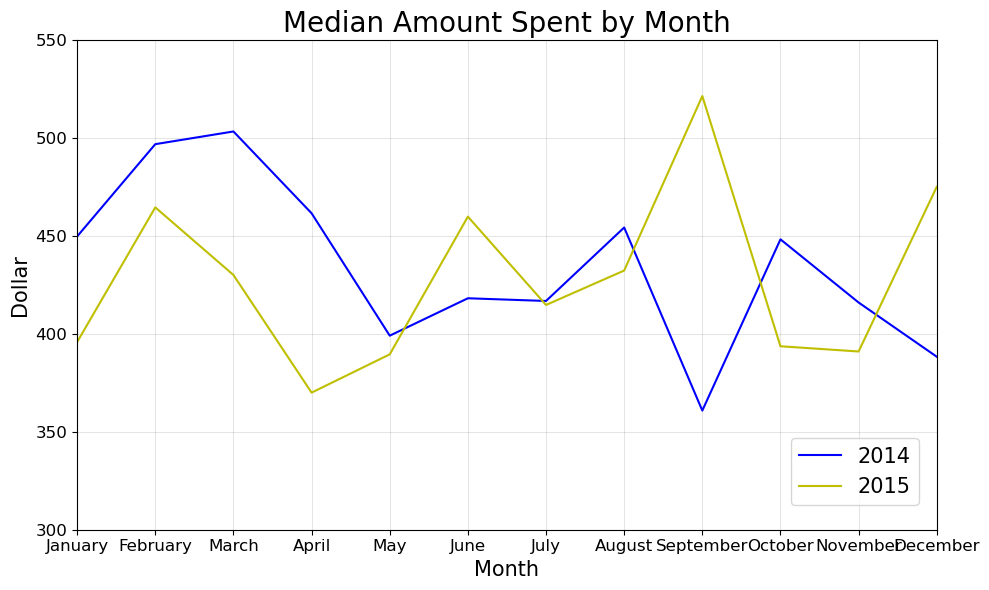

In [33]:
# Create a figure and subplot with 1 row and 1 column, set figure size to 10 by 5
fig, ax4 = plt.subplots(nrows = 1, ncols = 1, figsize=(10,6))

# Create one plot containing line charts for revenue and profits (remember to set legend labels)
ax4.plot(month,spent_2014, c='b', label='2014')
ax4.plot(month,spent_2015, c='y', label='2015') #with legend tables

# Set appropriate title for plot (set font size to 20))
ax4.set_title('Median Amount Spent by Month', fontsize = 20)

# Set labels for x-axis and y-axis (set font size to 15)
ax4.set_xlabel('Month', fontsize = 15)
ax4.set_ylabel('Dollar', fontsize = 15)

# Set font size of ticks on the x-axis and y-axis to 10
ax4.tick_params(labelsize=12, axis='both')

# Set appropriate ranges for the x-axis and y-axis
ax4.set_xlim(left=0, right=11)
ax4.set_ylim(bottom=300, top=550)

# Set grid lines to red, 0.2 transparency and dashed linestyle
ax4.grid(c='k',alpha=.1, linestyle='-')

# Set appropriate appropriate position for the legend
ax4.legend(loc=(0.83,0.05), borderaxespad=0, fontsize = 15)


# Set tight layout for figure
fig.tight_layout()
plt.show()

Process:
This line chart, similar to the first line chart, was created using the object oriented style for effectiveness. However, this chart allows us to analyse the median amount spent in year 2014 and 2015 by months. The amount spent was calculated by grouping 'total_$', which is a new column which is the total of all the different spendings by each case. By grouping this column and calculating the median, we get the required data to start plotting after creating the respective lists for the 2 years.

Descriptive Analysis Techniques: Overall, the 2 lines shows similar patterns, except the August to October period. For both years, the median spent increases sharply from January to February, but starts slowly dipping from the February to May period. The median spent proceeded to have a slight increase at June and August, but as the median amount spent drops at September for the year 2014, the median amount spent rises significantly for the year 2015, which was the peak. However, the median amount spent starts rising for the September to October period in 2014, and starts dropping for that same period in 2015 (descriptive analysis). From this chart, it can be predicted that the period of February to April/May would drop as well, as the trend for that period stayed the same for 2 years (predictive analysis). 

Findings/Insights on Visual and Questions: The question 'When was the peak market period of 2014 and 2015, in terms of dollars?' was answered in this visual. From this chart, it can be seen that the peak for 2015 is at September, and the peak for 2014 is March. However, since the increase and decrease from Feb to Mar and Mar to Apr is very little, it is not that significant. The tourism research team should look back at what was done differently from August to September at year 2015, to know what caused the sharp increase of money spent. This may help us to be informed of tourists' demands and attract more of them, thus improving the tourism industry (prescriptive analysis). 

Design Decisions: As this second chart is very similar to the first chart (same x-axis and both comparing the 2 years), the same design from the first chart was implemented to this one. The design and colours of the lines were kept the same to keep it consistent and to avoid confusion. 

### 3.3 Visual 3
Are travellers likely to come Singapore a second time? 
Does gender affect it?


In [60]:
# Define x-axis and y-axis data values
x_labels = df['1st_visit'].unique().tolist() #yes or no
visits = df.groupby(['f1_gender', '1st_visit'])['1st_visit'].count().tolist()
women_visit = visits[:2]
men_visit = visits[2:]
visits

[3478, 642, 4115, 652]

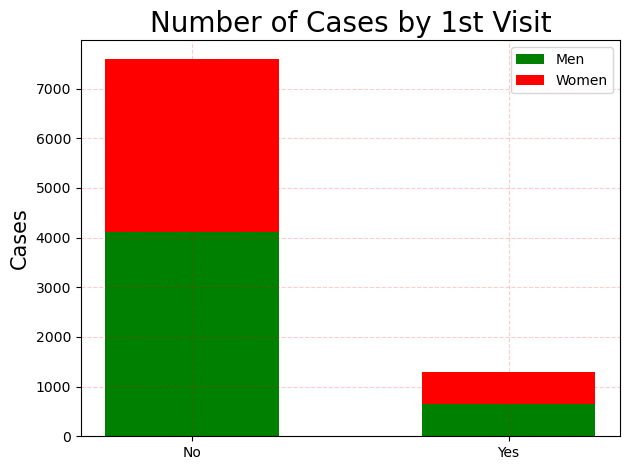

In [35]:
# Set the width of the bars
width = 0.55 

# Create a figure and subplot (default is 1 row by 1 col)
fig, ax = plt.subplots() 
plt.style.use('tableau-colorblind10')
# Plot stacked bars
ax.bar(x_labels, men_visit, width, label='Men', color = 'green')
ax.bar(x_labels, women_visit, width, bottom=men_visit, label='Women', color = 'r')

# Set title, y-axis label and show legend
ax.set_title('Number of Cases by 1st Visit', fontsize = 20)
ax.set_ylabel('Cases', fontsize = 15)
ax.legend()
# Set tight layout for figure
fig.tight_layout()
plt.grid(c = 'r', alpha=.2, linestyle = '--')
# Display the plot
plt.show()

Process:
At first, I just wanted to find out if these tourists like Singapore enough to visit us a second time. However, as I was plotting, I decided to make a stacked bar chart, to find out if the gender of the tourists has any affect on willingness to come to Singapore more than once. In order to get our data, .count().tolist() was used to count how many cases are having their first visit/not first visit by their gender. As the list contains female data, followed by men, I sliced the list accordingly to get my required data to start plotting. 

Descriptive Analysis Techniques: From the chart, it is observed that the gender does not affect the number of cases on their first or not as the categories 'No' and 'Yes' both contain about half men and half women. Hence, there is no correlation between gender and first visit (correlation analysis). It can also be observed that the number of cases not on their first visit is around 7x more than cases on their first visit (descriptive analysis). This suggests that many tourists that came to Singapore were satisfied with the hospitality, comfort, and standard here, so much so that they are willing to visit Singapore more than once (diagnostic analysis).  As long as the treatment towards tourists maintains or improve, it is likely that the number of cases of tourists coming to Singapore more than once would continue to rise (predictive analysis). 

Findings/Insights on Visual and Questions: The question that was answered from this chart is 'Are tourists likely to come Singapore a second time?' and 'Does gender affect coming to Singapore more than once?'. From the chart, we can easily see that many tourists are coming back to Singapore more than once, as 'No' in '1st visit' column meant that they came Singapore previously. This is important for the tourism research team as we need to know if tourists are satisfied with the many tourism industries and attractions in Singapore, and ensure that their needs are addressed. This will generate greater tourism revenue. 

Design Decisions:
As this visual is to be put together in the same dashboard with the first 2, I have decided to use medium bright colours (like the colours in the first 2 charts), so that this chart would not stand out too much and is comfortable to look at. I have also added 'plt.style.use('tableau-colorblind10')' when creating this chart, so that colour-blind people can study the chart with ease. 

### Visual 4

Which Top 5 city residence do our travellers come from? 

In [36]:
from matplotlib.patches import Patch

In [37]:
# Define x-axis and y-axis data values
citycases = df.groupby('city_residence')['case'].count()
citycases.sort_values(ascending=False,inplace=True)
citycases.tolist()
top5city = citycases[:5]

cities = citycases.index.tolist()
citygrp = cities[:5]

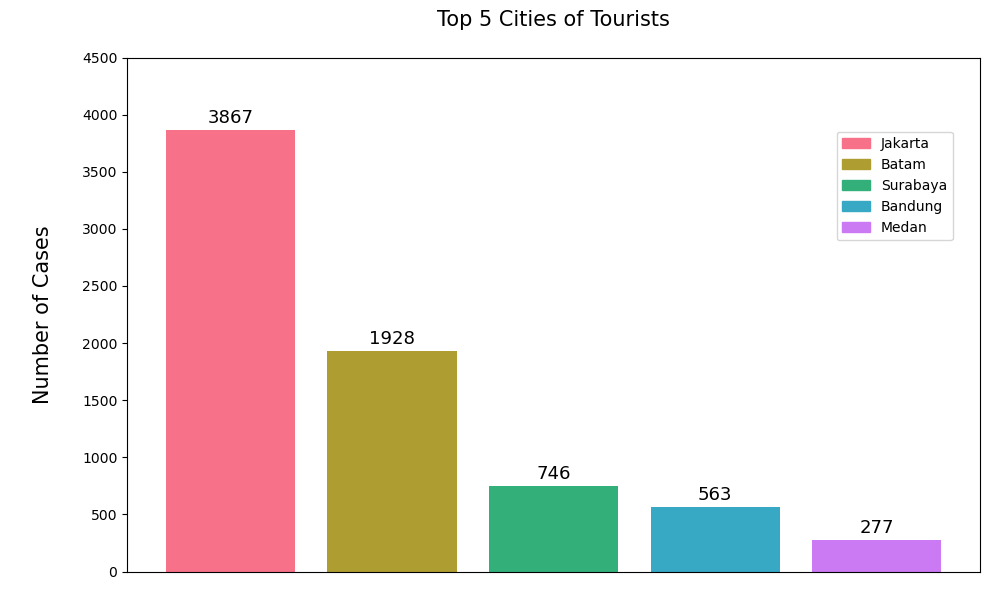

In [38]:
#set width of the bars
width = 0.8

#create a figure and subplot
fig, ax1 = plt.subplots(figsize=(10,6))
colors = sns.color_palette('husl', n_colors=len(citygrp))

#plot the chart
ax1.bar(citygrp, top5city, width , label='No. of Cases', color=colors)

#settings:
ax1.set_title('Top 5 Cities of Tourists\n', fontsize= 15)
ax1.set_ylabel('\nNumber of Cases\n', fontsize=15)
ax1.set_ylim(bottom=0, top=4500)
ax1.legend()
ax1.grid(False)
ax1.xaxis.set_visible(False)
# create the rectangles for the legend
cmap = dict(zip(citygrp, colors))
patches = [Patch(color=v, label=k) for k, v in cmap.items()]
# add the legend
plt.legend(handles=patches, bbox_to_anchor=(0.9, 0.75), loc='center', borderaxespad=0)
#Display Annotations

for x, y in zip(citygrp, top5city):
    label = y
    
    ax1.annotate(label,
                (x,y),
                textcoords = "offset points",
                xytext=(0,5),
                ha = 'center', fontsize=13)
    
fig.tight_layout()
plt.show()

Process: 
In order to find out where our tourists come from, I would need to group by the city residence and use .count() to get the total number of cases for each city. The data is also sorted, such that the chart would show the cities in descending order, so that it is easy to comprehend. This way, I am able to make it into a list and start plotting. This chart would allow me to gain knowledge of where most our tourists come from. From there, we can dig deeper and gain further insights to improve tourism revenue. A standard bar chart with object oriented style is used as it is able to display the exact number of cases of each city clearly. 

Descriptive Analysis Techniques: As it is arranged in descending order, we can see that most of our tourists come from Jakarta, followed by Batam(descriptive analysis). From this visual, we can assume that there were alot more cases from Jakarta as Jakarta is the richest city in Indonesia, which means there are possibly richer people residing there (diagnostic analysis). 

Findings/Insights on Visual and Questions: This chart answers the question 'Which Top 5 city residence do our tourists come from?'. As a tourism researcher, I would use this data to understand which city residence has the most tourists coming to Singapore, and use similar marketing methods to market (target) at other cities such as Medan, or the next richest city, so that we can attract more tourists to Singapore. 

Design Decisions:
Since I am adding this visual into my first dashboard, I wanted this chart to be fun and appealing to look at. Additionally, I made use of the legends to show the city names, so that the chart would not look too wordy and messy.

### 3.2 `Tourists' Preferability`  <a id="part3.2"></a> 

### Visual 5

 Which languages are dominant amongst the travellers? 

In [39]:
# Define x-axis and y-axis data values
langcase = df.groupby('langint')['case'].count()
langcase.sort_values(ascending=False,inplace=True)
langcase.tolist()
langcase = langcase[:5]

lang = langcase.index.tolist() #name


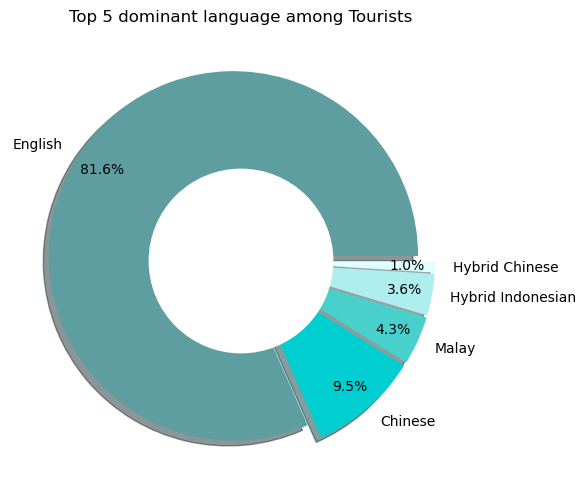

In [40]:
# colors
plt.figure(figsize=(10,6))
plt.style.use('tableau-colorblind10')
colors = ['cadetblue', 'darkturquoise', 'mediumturquoise',  
           'paleturquoise', 'lightcyan']
# explosion
explode = (0.05, 0.05, 0.05, 0.05, 0.05)
  
# Pie Chart
plt.pie(langcase, colors=colors, labels=lang,
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode, shadow=True)
  
# draw circle
centre_circle = plt.Circle((0, 0), 0.5, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

# Adding Title of chart
plt.title('Top 5 dominant language among Tourists')
  
# Displaying Chart
plt.show()

Visualisations
• Describe the process to perform univariate and multivariate analysis on your 
dataset.
• Using descriptive analytics techniques (i.e. statistical analysis, correlation analysis 
and basic visualisations etc), document your findings.
• Identify the core findings and insights that help to answer the business/research 
questions identified earlier. Create the visualisations using Python programming.
• What are the different visualisations you have considered? Justify the design 
decisions you made using visualisation and design principles.
• Describe each visualisation by highlighting the business/research questions it 
answers.

Process: As I need my chart to be categorised by language, I start by grouping the language and number of cases, and sorted it so that I will get the data of the top 5 most used language of our tourists.

Descriptive Analysis Techniques: This chart shows the top 5 most popular languages spoken by our tourists. The most popular being English, followed by Chinese, Malay, Hybrid Indonesian and Hybrid Chinese (desccriptive analysis). It is expected that English would be the most popular as most people grew up talking in English (Indonesians). 

Findings/Insights on Visual and Questions: This chart answers the question 'Which languages are dominant amongst the travellers?'. From this chart, it would be English and Chinese (top2). We will make use of this data to our advantage to increase tourism by hiring more tour guides, or any job that is under the tourism sector, who knows how to speak these languages. This would bring in more tourists as they would be able to communicate, which would make tourists feel more included and willing to come to Singapore more often. 

Design Decisions: I have decided to use a donut chart instead of the basic pie chart so that the dashboard would look more appealing and interesting, as it has more variety. 

###  Visual 6

What travel type is the most popular? 

In [41]:
# Define data values
num_of_case = df.groupby('travel_type')['case'].count()
travel_grp = num_of_case.index

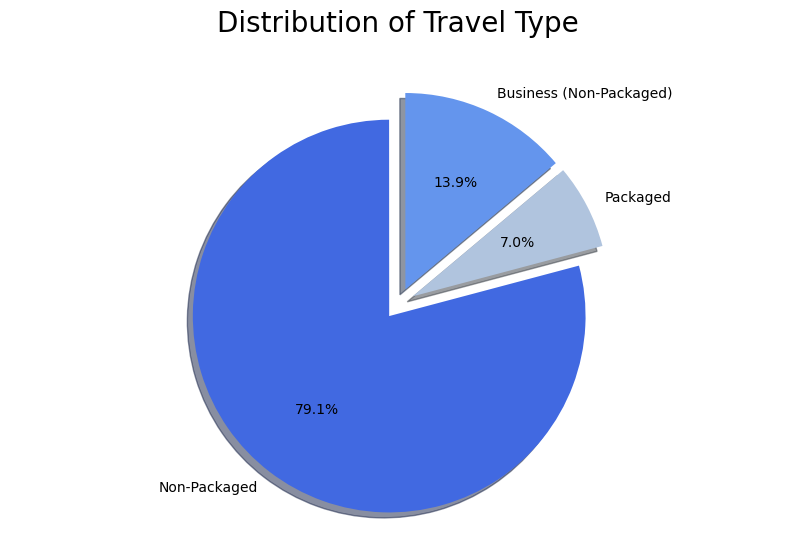

In [42]:
# Enter your code here:
fig, ax = plt.subplots(figsize=(10,6))
myexplode = [0.08, 0.08, 0.08]
colors = ['cornflowerblue','royalblue','lightsteelblue']
ax.pie(num_of_case,  colors = colors, explode = myexplode, labels=travel_grp, autopct='%1.1f%%',
        shadow=True, startangle=40)
ax.set_title('Distribution of Travel Type\n', fontsize =20)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Process: In order to answer this question, I would need to count the number of cases of the different travel type, and use .index of it to get the respective name of the travel type. These travel types are a way of promoting tourism as packaged travel type would offer necessary aid of any manner, to suit the tourists' needs and interests.

Descriptive Analysis Techniques: From the chart, we can derive that Non-Packaged is the most popular travel type at a whopping 79.1%, and Packaged is the least popular (descriptive analysis). Hence, it this suggests that it may be due to tourists' preferring to travel independently (diagnostic analysis). We also realise that more needs to be done to encourage more people to purchase the Packaged travel type. Having more digital marketing may allow more people to understand and know what the package has to offer. We can also include more / or change some elements in the package, to cater to tourists' needs (prescriptive analysis).

Findings/Insights on Visual and Questions: This simple pie chart answers the question 'What travel type is the most popular?'. This question can be important to us as we need to find out what are the needs of our tourists. Additionally, the packaged travel type is to attract more tourists. Since we know that the package is not high in demand from the data visual, we can assume that it is not doing its job to attract more tourists. Therefore, we can take action and improve on the package services to make travel easier and more convenient, and garner more attention from people outside of Singapore.

Design Decisions: A pie chart is used for this visual as there are only 3 categories and a pie chart would make it extremely simple to understand and it would also look better on a dashboard (aesthetic purposes).Shadow is also used to make the chart more visually appealing. I chose different shades of blue on this chart as they are categorical.

### Visual 7

Which terminal has the highest popularity? (sea,land,air)

In [64]:
#Prepare data
terminal_2014 = df[df['year']==2014]
terminal_2014 = terminal_2014.groupby(['land_terminal', 'air_terminal', 'sea_terminal'])['case'].count().tolist()
sea_2014 = terminal_2014[0] + terminal_2014[1] + terminal_2014[2] + terminal_2014[3]
air_2014 = terminal_2014[4] + terminal_2014[5] + terminal_2014[6]
land_2014 = terminal_2014[7] + terminal_2014[8]
t_2014 = [sea_2014, air_2014, land_2014]

terminal_2015 = df[df['year']==2015]
terminal_2015 = terminal_2015.groupby(['land_terminal', 'air_terminal', 'sea_terminal'])['case'].count().tolist()
sea_2015 = terminal_2015[0] + terminal_2015[1] + terminal_2015[2] + terminal_2015[3]
air_2015 = terminal_2015[4] + terminal_2015[5] + terminal_2015[6]
land_2015 = terminal_2015[7] + terminal_2015[8]
t_2015 = [sea_2015, air_2015, land_2015]

terminal_grp = ['Sea Terminal', 'Air Terminal', 'Land Terminal'] #x-axis


[1279, 18, 6, 66, 1956, 76, 852, 153, 6]

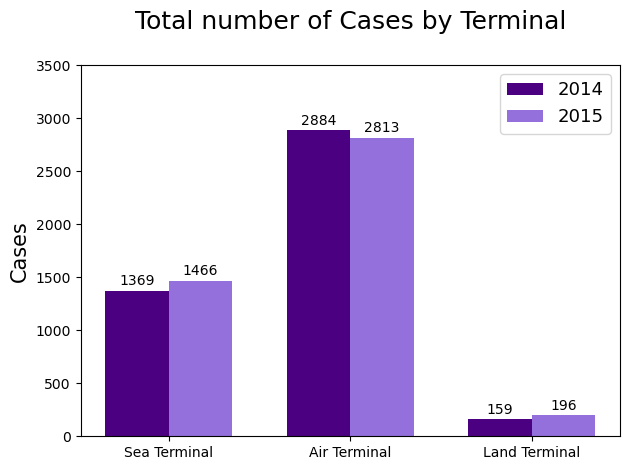

In [44]:
# Set the label locations and width of the bars
x = np.arange(len(terminal_grp))  
width = 0.35

# Create a figure and subplot
fig, ax = plt.subplots()

# Plot side-by-side bars
bar1 = ax.bar(x - width/2, t_2014, width, color='indigo', label='2014')
bar2 = ax.bar(x + width/2, t_2015, width, color='mediumpurple',label='2015')

# Customise the plot
ax.set_title('Total number of Cases by Terminal\n', fontsize = 18)
ax.set_ylabel('Cases', fontsize = 15)
ax.set_xticks(x)
ax.set_xticklabels(terminal_grp)
ax.set_ylim(bottom = 0, top = 3500)
ax.legend(fontsize=13)

# Create a function to display data labels/annotations for each bar
def autolabel(bars):
    for each in bars:
        height = each.get_height()
        ax.annotate('{}'.format(height),
                    xy=(each.get_x() + each.get_width() / 2, height),
                    xytext=(0, 2),  # 2 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Use function to display data labels for both bars
autolabel(bar1)
autolabel(bar2)

# Set tight layout for figure
fig.tight_layout()
ax.grid(False)
# Display plot
plt.show()

Process: In order to plot this visual, I needed to filter the years into 2014 and 2015, and count the number of cases of the 3 different terminal options. I used .count() to count the number of cases and added them to their respective list. The total number of cases in 2014 is 4412 and the total number of cases in 2015 is 4475. We can also tell that the total number of cases from 2014 to 2015 increased by 63. 

Descriptive Analysis Techniques: Overall, the Air Terminal is the most popular terminal in 2014 and 2015, followed by Sea and Land. In 2015, the total number of cases for sea and land terminals increased slightly compared to 2014, while the number of cases for air terminals decreased slightly (descriptive analysis). The air terminal is expected to be the most popular mode of transportation because it is the quickest way to travel from Indonesia to Singapore, making it more convenient (diagnostic analysis, predictive analysis). Since land terminal is the least popular, the tourism industry must find ways to improve the accessibility and convenience of it to attract more people to use land terminal.   

Findings/Insights on Visual and Questions: The question that this chart answers is 'Which terminal has the highest popularity?'. As said earlier, the tourism industry may need provide better aesthetics or reliability(e.g. safety, availability, comfort, traffic, etc) of the land and sea terminal. These may catch the attention of more tourists and encourage them to use them, meeting our goal of attracting more people to Singapore and increasing tourism revenue.

Design Decisions: A grouped bar chart is used as I want to be able to compare the difference in number of cases of the 2 different years, to see if the year affects the total number of cases of each terminal. I chose different shades of purple for this chart so the colours will not clash with Visual 6 in the dashboard.

### Visual 8

What are the top 10 main hotels travellers prefer to stay in?

In [45]:
# Define x-axis and y-axis data values
hotelcases = df[df['mainhotel'] !='NA']
hotelcases = hotelcases.groupby('mainhotel')['case'].count()
hotelcases.sort_values(ascending=False,inplace=True)
hotelcases.tolist()
top10hotels = hotelcases[0:10]

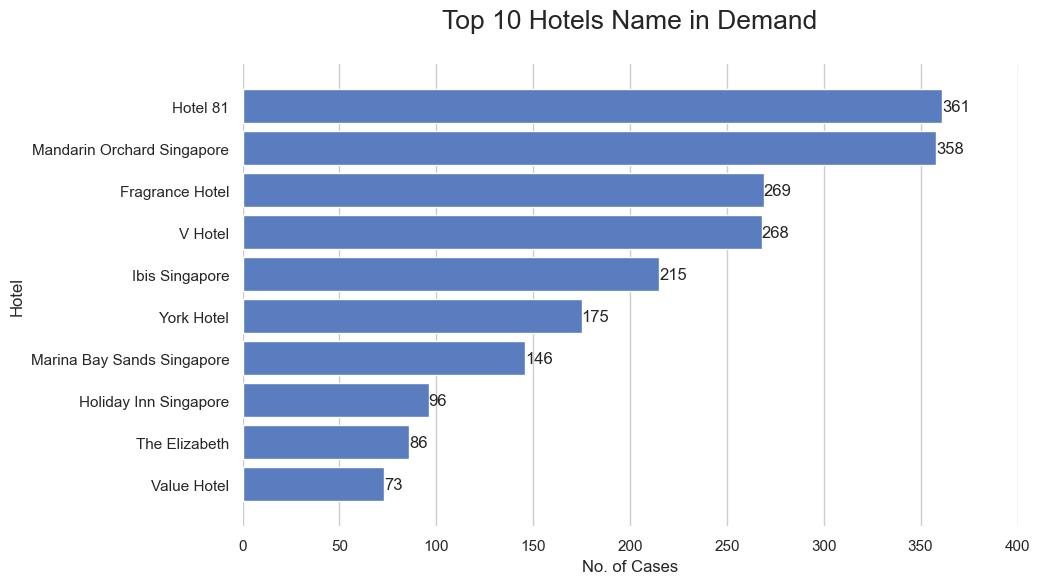

In [46]:
#set width of the bars
width = 0.5
sns.set_theme(style="whitegrid")
#create a figure and subplot
fig, ax = plt.subplots(figsize=(10,6))

#Reverse sort for plotting 
top10hotels.sort_values(ascending=True,inplace=True)
hotel_list = top10hotels.index

#plot the chart
sns.set_color_codes("muted")
plots = sns.barplot(x=top10hotels, y=hotel_list,
            label="No. of Cases", color="b")

for c in ax.containers:
    # set the bar label
    ax.bar_label(c, fmt='%.0f', label_type='edge')

# Add a legend and informative axis label
ax.set_title("Top 10 Hotels Name in Demand\n", fontsize = 19)
ax.set(xlim=(0, 400), ylim=(-1,10), ylabel="Hotel",
       xlabel="No. of Cases")
sns.despine(left=True, bottom=True)
plt.show()


Process: Before performing any analysis, defining our data values and plotting of the chart comes first. Firstly, I filtered off the NA values, to get the relevant data. Then I group the case counts by hotel names and sort them so that they appear in descending order in the chart. Now I will plot and analyse the top hotels in Singapore.

Descriptive Analysis Techniques: This horizontal bar chart shows the popularity of the hotels in descending order from the top. The most popular hotel being Hotel 81, with 361 cases, and the 10th hotel being Value Hotel, with only 73 cases (descriptive analysis). These are the hotels that are doing well to moderately well and providing services that our tourists want, and other hotels should offer more services or maintain higher standards to catch up. (diagnostic analysis, prescriptive analysis). 

Findings/Insights on Visual and Questions: This chart answers the question 'What are the top 5 main hotels travellers prefer to stay in?'. Knowing which hotels are performing well and in high demand allows us to investigate what these hotels are offering to tourists, which is essentially catering to the needs of the customers. From this chart, we can gain insight on what type of service our tourists are drawn to and learn from them, allowing us to gain a more comprehensive understanding our my customers (prescriptive analysis).  

Design Decisions: There are annotations for each bar so that we can find out the exact number of cases for each hotel. The vertical grid lines (x-axis) is included for a rough gauge of the number of cases. 


### 3.3 `Tourists' Needs`  <a id="part3.3"></a> 

### Visual 9

What occupation group does Singapore attract most? Does the occupation group affect the median amount spent? Which group do we need to attract to benefit the Singapore tourism market?

In [47]:
#Define data values
occ_cases = df[df['f3_occupation']!='NA']
occ_cases = occ_cases.groupby('f3_occupation')['case'].count()
occ_cases.sort_values(ascending=False,inplace=True) #sort from largest to smallest occ grp
occ_cases.tolist()
occ_grp = occ_cases.index #occupation name

#Define data values for occupation median spent
occ_spent = df.groupby('f3_occupation')['total_$'].median()
med_spent_list = [479.916917, 422.281586, 560.278149, 757.355682, 321.434839, 399.860754, 346.449034,
                 341.955725, 410.925625, 178.059313, 713.406608, 209.084210, 954.966982] #for line

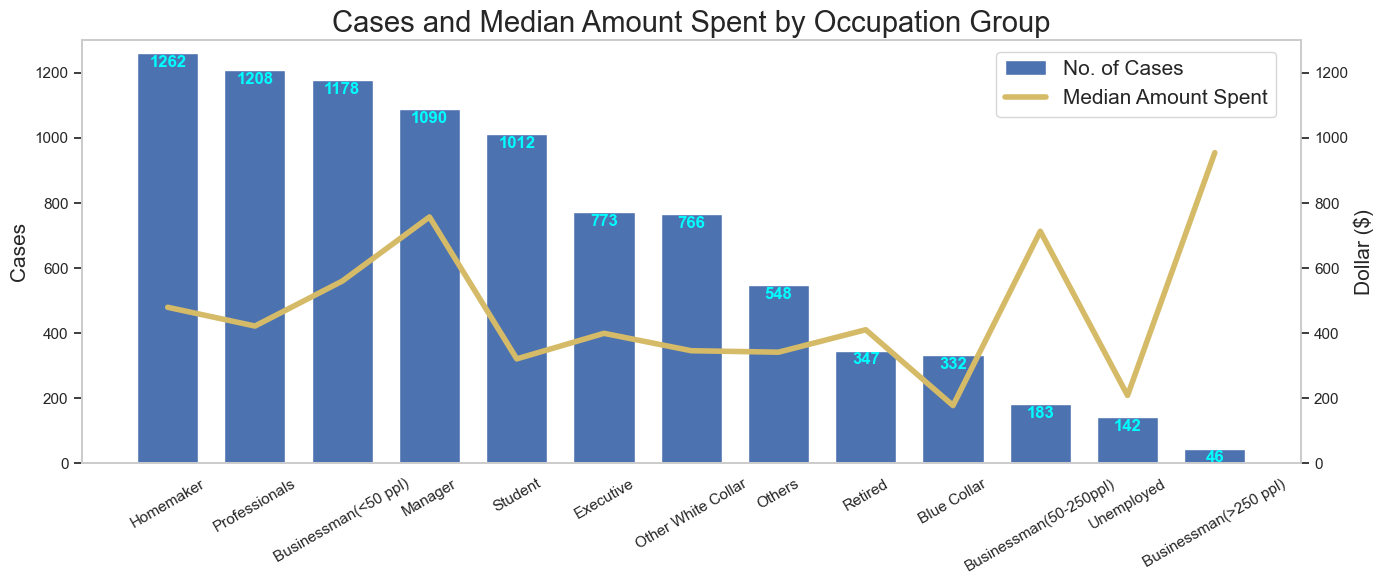

In [48]:
# Create a figure and subplot for revenue chart
fig, ax_r = plt.subplots(1,1,figsize=(14,6))

# Plot revenue chart
ax_r.bar(occ_grp, occ_cases,width=0.7, label='No. of Cases')
ax_r.set_ylim(bottom = 0, top = 1300)
ax_r.set_title('Cases and Median Amount Spent by Occupation Group', fontsize = 21)
ax_r.set_ylabel('Cases', fontsize = 15) # first y-axis (on the left)

ax = plt.gca()
ax.tick_params(axis='x', labelrotation = 30)

# Instantiate a second axes that shares the same x-axis
ax_p = ax_r.twinx()

# Plot profits chart
ax_p.plot(occ_grp, med_spent_list, 'y', linewidth = 4, label = 'Median Amount Spent')
ax_p.set_ylim(bottom = 0, top = 1300)
ax_p.set_ylabel('Dollar ($)', fontsize = 15) # second y-axis (on the right)
ax_p.grid(False)
ax_r.grid(False)

# Set location of legend for both axes
fig.legend(loc=(0.72,0.8), fontsize = 15)

#Display Annotations
for x, y in zip(occ_grp, occ_cases):
    label = y
    
    ax.annotate(label,
                (x,y),
                textcoords = "offset points",
                xytext=(0,-10),
                ha = 'center', fontsize=12, fontweight="bold", color='aqua')

# Set tight layout for figure
fig.tight_layout()

# Display plot
plt.show()

Process: To create a chart to answer my exploratory questions, I need the data of number of cases for each occupation group, and the median amount ($) spent for each occupation group. Hence, I would need to make use of .count() and .median() to get my required data to start plotting. 

Descriptive Analysis Techniques: In this chart, we have two different trends to look at. Overall, we can see that some occupations such as Manager, Businessman (50-250ppl) and Businessman(>250ppl) have a higher median amount spent compared to the other occupations, and the rest is all around the same range. Looking at the bar chart (x-axis and left y-axis), there is an obvious decline in the number of cases from the left of the occupation groups. This demonstrates that the occupation group that came to Singapore the most in 2014 and 2015 was Homemakers, followed by Professionals, and the least was Businessman (>250ppl). Looking at the line chart (right y-axis), we can see that most of the median amount spent for the different occupations are below 600 and are quite constant. There are only 3 points that stood out (>600), and the occupation that has the highest median amount spent is Businessman(>250ppl), at nearly 1000. (descriptive analysis, statistical analysis)

Findings/Insights on Visual and Questions: The questions that were answered from this chart alone are 'What occupation group does Singapore attract most?', 'Which group do we need to attract to benefit the Singapore tourism market?', and 'Does the occupation group affect the median amount spent?'. The top 3 occupation group that Singapore attracts the most are Homemakers, Professionals, and Businessman(<50ppl). The group that we need to attract are the occupation groups that does not come to Singapore often (low number of cases) and has an above average median amount spent compared to the other occupation groups. Hence, the group that we would want to attract are the Businessman(>250ppl) and Businessman(50-250ppl), to boost our tourism, economic, and employment rate. Lastly, yes, occupation groups does affect the median amount spent. It is expected that occupations like Businessmen and Managers are likely to have a higher median amount spent as they tend to be the wealthier ones (diagnostic analysis/correlation analysis).  

Design Decisions: In this chart, I have decided to use a Dual Axis Chart (OO style) as it is able to show 2 different y-axis and the same x-axis, so that I can do correlation. I added annotations for the bar chart and made it a different colour and bolded it so that viewers are able to see it clearly. Plus, the width of the line is also thickened, so that we can analyze without straining our eyes. The occupation group names are also rotated to ensure that the words do not overlap and cause confusion.

### Visual 10


Are we doing enough to let tourists stay in singapore longer?

In [49]:
# Define data values
stays = df.groupby('length_stay')['case'].count()
stay_grp = stays.index

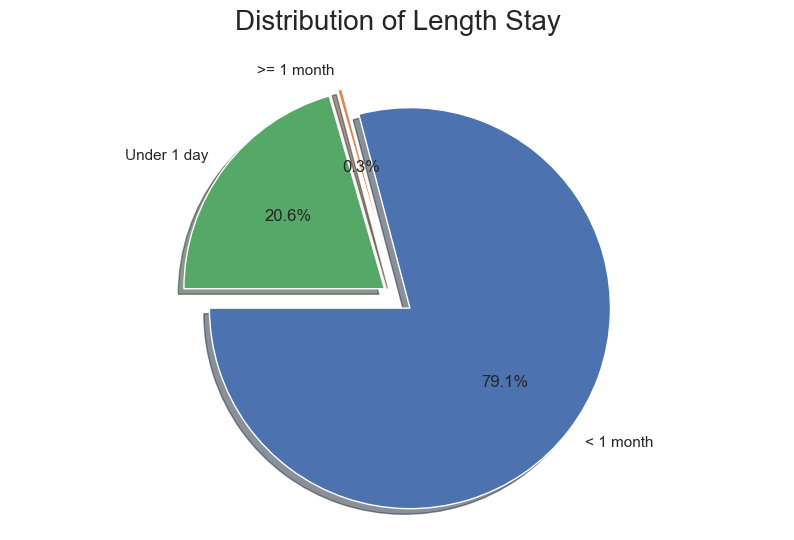

In [50]:
# Enter your code here:
fig, ax = plt.subplots(figsize=(10,6))
myexplode = [0.08, 0.08, 0.08]
colors = ['#ff9899','#66c3ff','#99ff20']
ax.pie(stays,   explode = myexplode, labels=stay_grp, autopct='%1.1f%%',
        shadow=True, startangle=180)
ax.set_title('Distribution of Length Stay\n', fontsize =20)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

Process: To be able to find out the distribution of the duration they stay in Singapore, we need to .count() the number of cases for the 3 groups of duration. 

Descriptive Analysis Techniques: This pie chart shows that 79.1% of the cases stay for at least one day but less than one month (assumingg 1 month is 30 days). 20.6% of the cases was in Singapore for less than one day, and only 0.3% of the cases stayed in Singapore for more than 1 month.(descriptive analysis) 

Findings/Insights on Visual and Questions:This chart answered the question 'Are we doing enough to let tourists stay in Singapore longer?'. Even though most of the people stay in Singapore for at least one day, the percentage of people that stayed in Singapore but less than a day is considerably high as well. We would need to dig deeper and find out what were the smile points about Singapore that convinced tourists to stay in Singapore for more than a month, and improve on it. We can also discover if there were any pain points that caused the 20.6% of tourists to leave Singapore in less than a day, and remove or solve the pain point. This way, Singapore can keep attracting new and more people. (prescriptive analysis)

Design Decisions: I just stuck with the default colours so that there will not be too much repeated colours with the other dashboards. A pie chart was chosen as it shows clearly visually, the percentage of the groups.

### Visual 11

What purpose of travel has the highest demand/popularity? (compare purpose group) 

In [1]:
#Define data values
p_cases = df[df['purpose_grp']!='NA']
p_cases = p_cases.groupby('purpose_grp')['case'].count()
p_cases.sort_values(ascending=False,inplace=True) #sort from largest to smallest purpose grp
p_cases.tolist()
p_grp = p_cases.index #purpose name

#Define data values for occupation median spent
p_spent = df.groupby('purpose_grp')['total_$'].median()
pmed_spent_list = [367.748509, 673.455881, 1124.453269, 140.007076, 436.021998] #for line


NameError: name 'df' is not defined

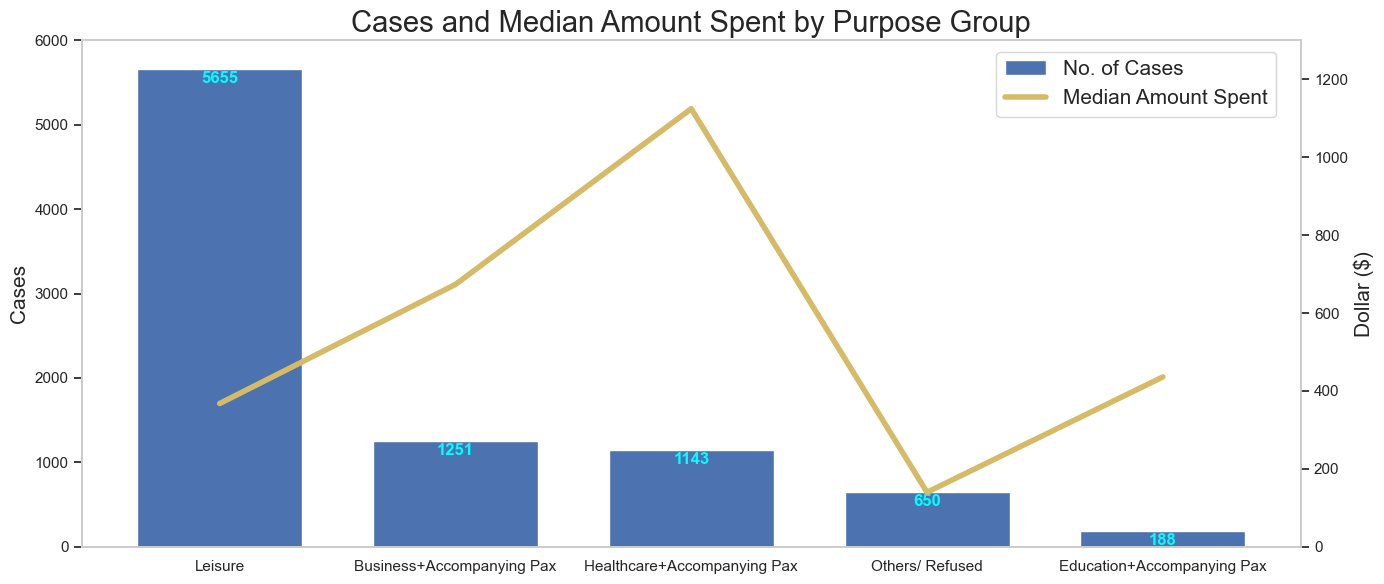

In [52]:
# Create a figure and subplot for revenue chart
fig, ax_r = plt.subplots(1,1,figsize=(14,6))

# Plot revenue chart
ax_r.bar(p_grp, p_cases,width=0.7, label='No. of Cases')
ax_r.set_ylim(bottom = 0, top = 6000)
ax_r.set_title('Cases and Median Amount Spent by Purpose Group', fontsize = 21)
ax_r.set_ylabel('Cases', fontsize = 15) # first y-axis (on the left)

ax = plt.gca()
ax.tick_params(axis='x', labelrotation = 0)

# Instantiate a second axes that shares the same x-axis
ax_p = ax_r.twinx()

# Plot profits chart
ax_p.plot(p_grp, pmed_spent_list, 'y', linewidth = 4, label = 'Median Amount Spent')
ax_p.set_ylim(bottom = 0, top = 1300)
ax_p.set_ylabel('Dollar ($)', fontsize = 15) # second y-axis (on the right)
ax_p.grid(False)
ax_r.grid(False)

# Set location of legend for both axes
fig.legend(loc=(0.72,0.8), fontsize = 15)

#Display Annotations
for x, y in zip(p_grp, p_cases):
    label = y
    
    ax.annotate(label,
                (x,y),
                textcoords = "offset points",
                xytext=(0,-10),
                ha = 'center', fontsize=12, fontweight="bold", color='aqua')
# Set tight layout for figure
fig.tight_layout()

# Display plot
plt.show()

Process: To plot this chart, I would need to .count() the number of cases of each purpose group, and find the .median() of the amount they spent by the purpose group. This chart allows me to correlate and find out if the purpose group affects the median amunt spent.
    
Descriptive Analysis Techniques: Overall, this dual axis chart shows the correlation of number of cases and median amount spent by each purpose group. The bar chart displays the number of cases by each purpose group in descending order, starting from the left. The line graph shows a growing trend from Leisure to Healthcare+Accompanying Pax, and reaches its peak at Healthcare+Accompanying Pax. Then, it plummets down as the line went to Others/Refused, and increases slightly again as it goes to Education+Accompanying Pax. The purpose group with the lowest median amount spent is Others/Refused. (descriptive analysis, statistical analysis/correlation analysis)
    
Findings/Insights on Visual and Questions: This chart answered the questions 'What purpose of travel has the highest demand/popularity?'. The most popular purpose group would be Leisure, and the 
Additionally, similar to the other dual axis chart above, we need to attract the purpose group with the highest spending, which would be Healthcare+Accompanying Pax. In order to get more people to come to Singapore for our Healthcare sector, we would need to improve our standards and service at our hospitals/healthcare centres (prescriptive analysis). Through this, we notice that customers tend to come to Singapore for our attractions and leisure activities. 

Design Decisions: In this chart, I have decided to use a Dual Axis Chart (OO style) as it is able to show 2 different y-axis and the same x-axis, so that I can do correlation. I added annotations for the bar chart and made it a different colour and bolded it so that viewers are able to see it clearly. Plus, the width of the line is also thickened, so that we can analyze without straining our eyes. The occupation group names are also rotated to ensure that the words do not overlap and cause confusion.


### Visual 12

How much are people willing to pay for each sector? 

In [53]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
df2 = df.loc[:, 'totacc_$':'totshopping_$']

In [54]:
df_spendings = df2[['totacc_$', 'totfnb_$', 'tottran_$','totbiz_$','totedu_$', 'totmedi_$', 'tototh_$', 'totshopping_$']]

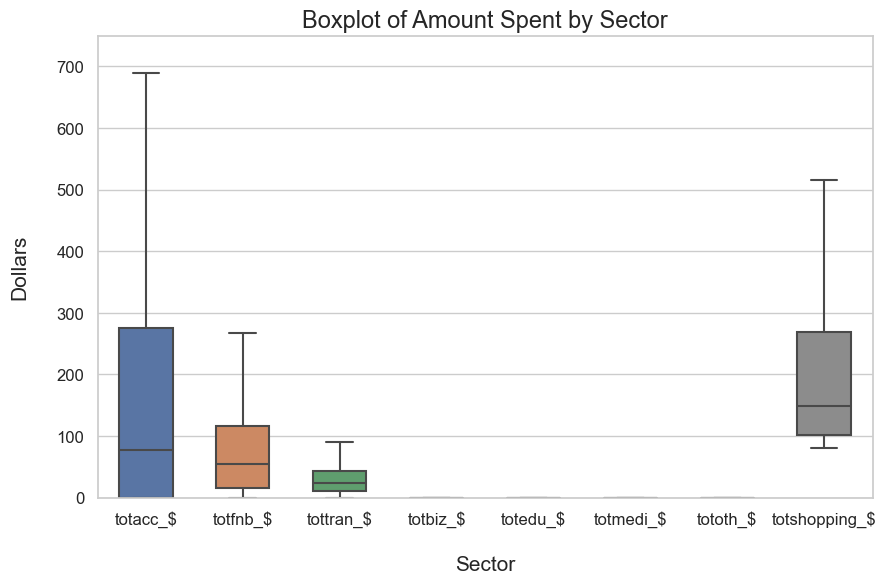

In [55]:
# Set figure size
plt.figure(figsize=(10,6))

# Create seaborn boxplot 
sns.boxplot(data=df_spendings, width=0.55, showfliers = False)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Boxplot of Amount Spent by Sector', fontsize = 17)
plt.xlabel('\nSector', fontsize = 15)
plt.ylabel('Dollars\n', fontsize = 15)
plt.ylim(bottom=0,top=750)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.show()


Process: A five-number summary of a set of data is shown. The five-number summary includes the minimum, first quartile, median, third quartile, and maximum. A box plot is created by drawing a box from the first to third quartiles. A vertical line runs through the box at the median.

Descriptive Analysis Techniques: The highest median is from shopping, as the middle line is the highest compared to the rest. The sector that has the highest maximum value is the from accommodation. The boxplot for amount spent on business, education, medicine, and others sector are at 0.

Findings/Insights on Visual and Questions: The question answered from this chart would be 'How much are people willing to pay for each sector?'. It would be on shopping, since it has the highest median. 

Design Decisions: I used seaborn to create a boxplot, and matplotlib to edit the chart. The use of seaborn makes the code shorter and more effective. 

# 4. Dashboards <a id="part4"></a>

### 4.1 `Dashboard 1`  <a id="part4.1"></a> 

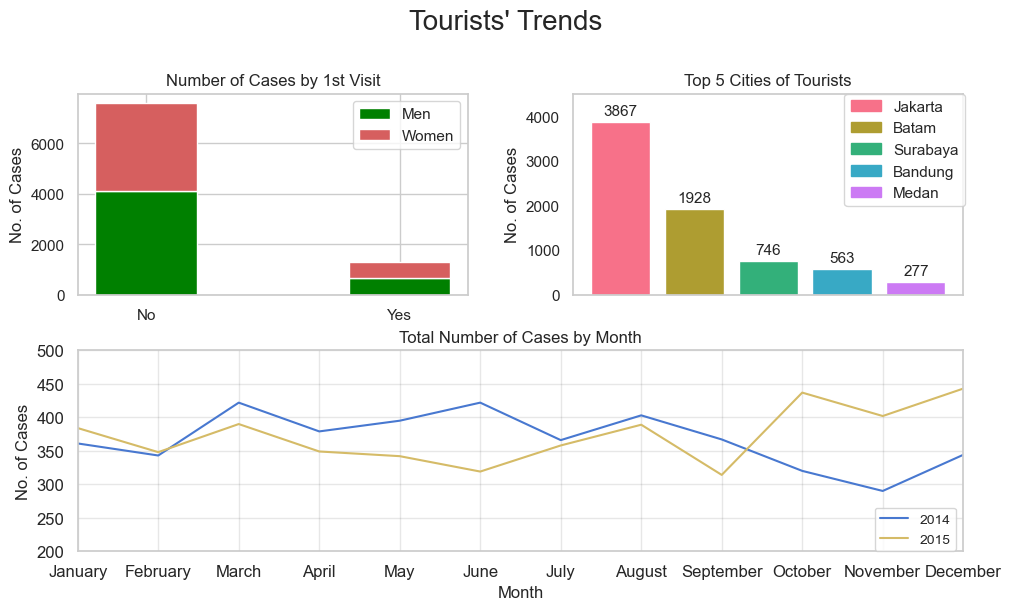

In [56]:
# Enter your code here:
fig = plt.figure(figsize=(10,8), constrained_layout=True)

#Use gridspec to determine the dimensions of the db
gs = GridSpec(nrows=3, ncols=2, figure=fig)
ax1 = fig.add_subplot(gs[1,:])
ax2 = fig.add_subplot(gs[0,0])
ax3 = fig.add_subplot(gs[0,1])

###############################################################################################################
# Create one plot containing line charts for revenue and profits (remember to set legend labels)
ax1.plot(month,count_2014, c='b', label='2014')
ax1.plot(month,count_2015, c='y', label='2015') #with legend tables

# Set appropriate title for plot (set font size to 20))
ax1.set_title('Total Number of Cases by Month', fontsize = 12)

# Set labels for x-axis and y-axis (set font size to 15)
ax1.set_xlabel('Month', fontsize = 12)
ax1.set_ylabel('No. of Cases', fontsize = 12)

# Set font size of ticks on the x-axis and y-axis to 10
ax1.tick_params(labelsize=12, axis='both')

# Set appropriate ranges for the x-axis and y-axis
ax1.set_xlim(left=0, right=11)
ax1.set_ylim(bottom=200, top=500)

# Set grid lines to red, 0.2 transparency and dashed linestyle
ax1.grid(c='k',alpha=.1, linestyle='-')

# Set appropriate appropriate position for the legend
ax1.legend(loc=(0.9,0.0), borderaxespad=0, fontsize = 10)

##############################################################################################################
# Set the width of the bars 
# Define x-axis and y-axis data values
ax2.bar(x_labels, men_visit, width=0.4, label='Men', color = 'green')
ax2.bar(x_labels, women_visit, width=0.4, bottom=men_visit, label='Women', color = 'r')
plt.style.use('tableau-colorblind10')
# Set title, y-axis label and show legend
ax2.set_title('Number of Cases by 1st Visit', fontsize = 12)
ax2.set_ylabel('No. of Cases', fontsize = 12)
ax2.legend()
plt.grid(c = 'r', alpha=.2, linestyle = '--')

###############################################################################################################
colors = sns.color_palette('husl', n_colors=len(citygrp))

#plot the chart
ax3.bar(citygrp, top5city, width=0.8 , label='No. of Cases', color=colors)

#settings:
ax3.set_title('Top 5 Cities of Tourists', fontsize= 12)
ax3.set_ylabel('\nNo. of Cases', fontsize=12)
ax3.set_ylim(bottom=0, top=4500)
ax3.legend()
ax3.grid(False)
ax3.xaxis.set_visible(False)
# create the rectangles for the legend
cmap = dict(zip(citygrp, colors))
patches = [Patch(color=v, label=k) for k, v in cmap.items()]
# add the legend
plt.legend(handles=patches, bbox_to_anchor=(0.85, 0.72), loc='center', borderaxespad=0)
#Display Annotations

for x, y in zip(citygrp, top5city):
    label = y
    
    ax3.annotate(label,
                (x,y),
                textcoords = "offset points",
                xytext=(0,5),
                ha = 'center', fontsize=11)
    
    
    
###############################################################################################################
# Display the plot
fig.suptitle("Tourists' Trends\n", fontsize=20)
plt.show()

##### Description and Analysis:

The topic of this first dashboard is regarding some trends / overall trends of our Indonesian tourists. From this dashboard, viewers (tourism/market research team) can find out what some of the important trends are. The dashboard lets us know whether our tourists enjoy coming to Singapore a second time or not (and even based on gender), it also lets us know where most of our tourists come from, as well as the total number of cases each month. From this dashboard alone, we are able to discover many information about our tourists, and try to target areas to attract more tourists to Singapore.

##### Viewing Process:

Upon seeing this dashboard, the first visual I would look at would be the Number of cases by 1st visits. From this visual, we can see that majority of our tourists have already visited Singapore before and this is not their first time. Therefore, we can assume that the tourism industry is actually doing quite well since many tourists actually enjoy coming to Singapore a second time or more. As it is also grouped by men and women, we are also able to see whether the gender affects the trend. However, in this case, it does not really matter as the men and women ratio are about the same. Next, I would look at the Top 5 cities of our tourists. This data allows us to discover where most of our tourists come from, and from here, we can use similar marketing strategies to market (target) at other cities such as Medan, or the next richest city, so that we can attract more tourists to Singapore. The last visual would be the total number of cases by month. Although this is a simple chart, it shows us the trend of tourists coming to Singapore throughout the months. By knowing this, we can pinpoint which months may have more people coming in to anticipate their needs. And by knowing which months tend to have fewer tourists, we can try to implement more marketing in that period of time. It helps forecast future travel volume and expenditure.

### 4.2 `Dashboard 2`  <a id="part4.2"></a> 

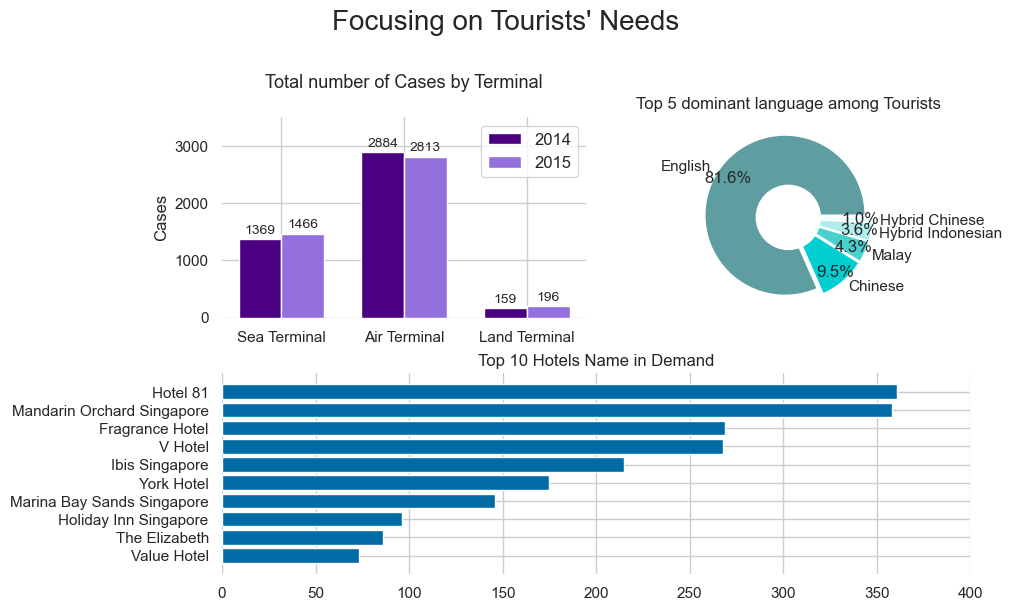

In [57]:
# Create a figure to be used as a dashboard
fig = plt.figure(figsize=(10,8), constrained_layout=True)

# Use GridSpec to determine the dimensions of the dashboard
gs = GridSpec(nrows=3, ncols=2, figure=fig)
ax1 = fig.add_subplot(gs[1,:])
ax2 = fig.add_subplot(gs[0,0])
ax3 = fig.add_subplot(gs[0,1])
plt.style.use('tableau-colorblind10')
#FIGURE 1
plt.grid(c = 'k', alpha = .2, linestyle = '--')

colors = ['cadetblue', 'darkturquoise', 'mediumturquoise',  
           'paleturquoise', 'lightcyan']
# explosion
explode = (0.05, 0.05, 0.05, 0.05, 0.05)
  
# Pie Chart
plt.pie(langcase, colors=colors, labels=lang,
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode)
  
# draw circle
centre_circle = plt.Circle((0, 0), 0.4, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)

# Adding Title of chart
plt.title('Top 5 dominant language among Tourists')

###############################################################################################

sns.set_theme(style="whitegrid")
ax1.barh(hotel_list,top10hotels, align='center')
for c in ax.containers:
    # set the bar label
    ax1.bar_label(c, fmt='%.0f', label_type='edge')

# Add a legend and informative axis label
ax1.set_title("Top 10 Hotels Name in Demand", fontsize = 12)
ax1.set(xlim=(0, 400), ylim=(-1,10))
sns.despine(left=True, bottom=True)

##########################################################################################################33
x = np.arange(len(terminal_grp))  
width = 0.35

# Plot side-by-side bars
bar1 = ax2.bar(x - width/2, t_2014, width, color='indigo', label='2014')
bar2 = ax2.bar(x + width/2, t_2015, width, color='mediumpurple',label='2015')

# Customise the plot
ax2.set_title('Total number of Cases by Terminal\n', fontsize = 13)
ax2.set_ylabel('Cases', fontsize = 12)
ax2.set_xticks(x)
ax2.set_xticklabels(terminal_grp)
ax2.set_ylim(bottom = 0, top = 3500)
ax2.legend(fontsize=12)

# Create a function to display data labels/annotations for each bar
def autolabel(bars):
    for each in bars:
        height = each.get_height()
        ax2.annotate('{}'.format(height),
                    xy=(each.get_x() + each.get_width() / 2, height),
                    xytext=(0, 2),  # 2 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)

# Use function to display data labels for both bars
autolabel(bar1)
autolabel(bar2)

# Displaying Chart
fig.suptitle("Focusing on Tourists' Needs\n", fontsize=20)
plt.show()



##### Description and Analysis:

This second dashboard focuses on discovering and being aware of our tourists' needs. This is very crucial for tourism market and research so that we can improve their experience in Singapore by catering to their needs. Hence, this dashboard is made. This dashboard allows us to know whether they enjoy their time in Singapore and feel included here as well.

##### Viewing Process:

The first visual that we would look at would be the total number of cases by terminal. As we can see that land terminal is the least popular, the tourism industry must find ways to improve the accessibility and convenience of it to attract more people to use land terminal. It allows us to know what terminal they dislike/do not use the most, and we would need to provide better aesthetics or reliability(e.g. safety, availability, comfort, traffic, etc) of the land and sea terminal. These may catch the attention of more tourists and encourage them to use them, meeting our goal of attracting more people to Singapore and increasing tourism revenue. The second chart would be the top 5 most dominant languages spoken by our tourists. This data would keep us updated about what languages they speak, so that the tourism industry can learn or hire people who already speak those languages, so that tourists that do not speak English or Chinese can feel included and will be able to communicate as well. This would improve their experience in Singapore, which is ultimately, our goal, so that they would come back here again. The last visual is the top 10 hotels they stay in. Knowing which hotels are performing well and in high demand allows us to investigate what these hotels are offering to tourists, which is essentially catering to the needs of the customers. From this chart, we can gain insight on what type of service our tourists are drawn to and learn from them, allowing us to gain a more comprehensive understanding our my customers. 

### 4.3 `Dashboard 3`  <a id="part4.3"></a> 

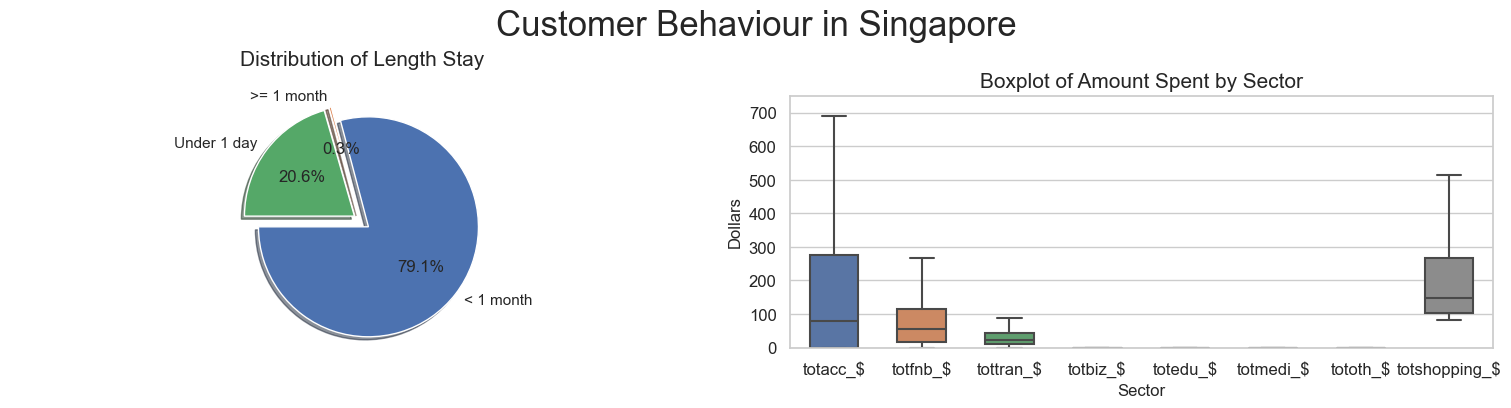

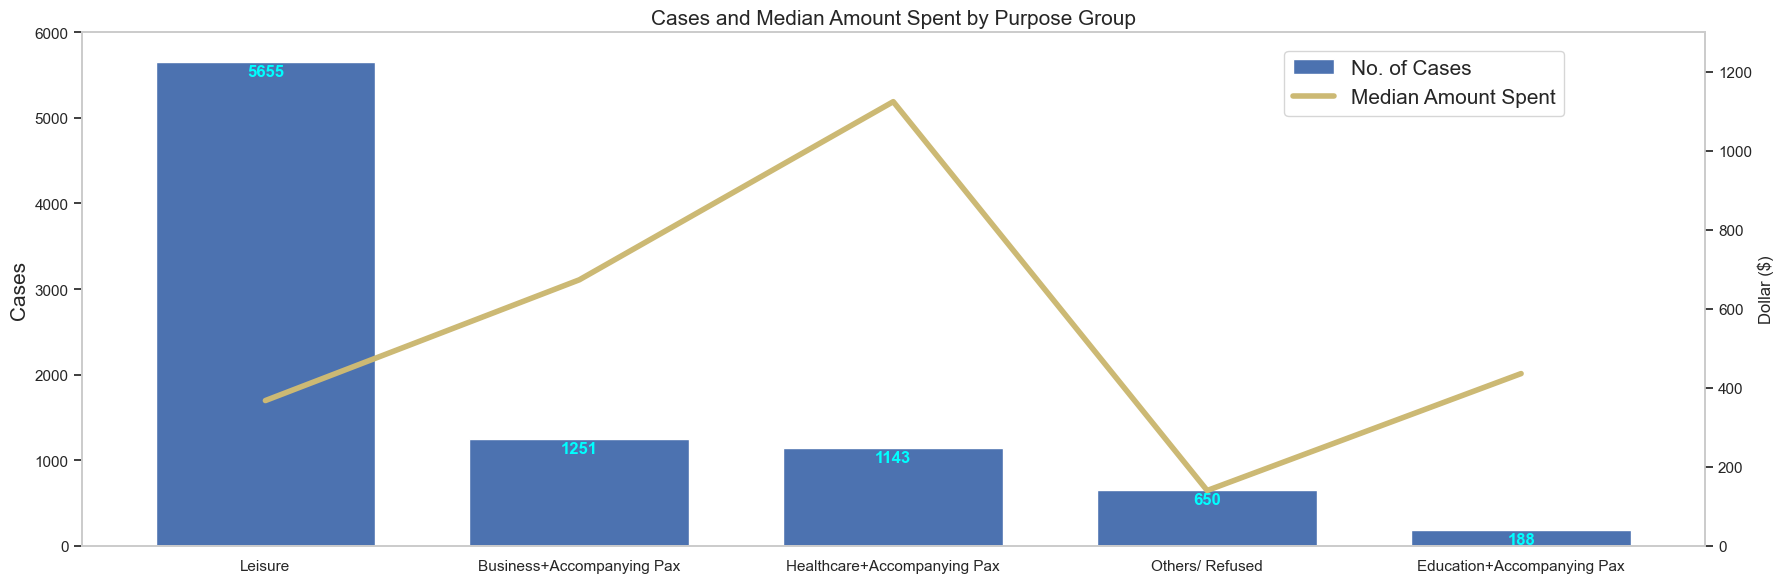

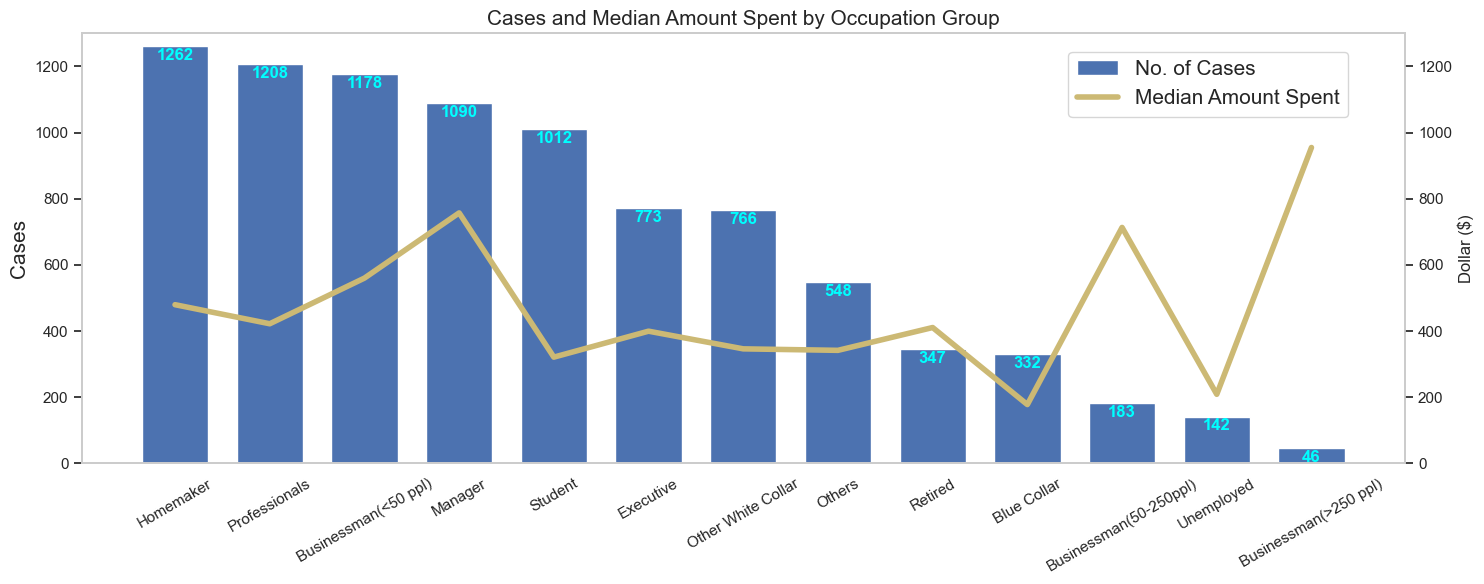

In [58]:
# Enter your code here:
fig = plt.figure(figsize=(15,9), constrained_layout=True)

#Use gridspec to determine the dimensions of the db
gs = GridSpec(nrows=3, ncols=2, figure=fig)
ax2 = fig.add_subplot(gs[0,0])
ax3 = fig.add_subplot(gs[0,1])
fig.suptitle("Customer Behaviour in Singapore", fontsize=25)
###################################################################
# Enter your code here:

myexplode = [0.08, 0.08, 0.08]
colors = ['#ff9899','#66c3ff','#99ff20']
ax2.pie(stays,   explode = myexplode, labels=stay_grp, autopct='%1.1f%%',
        shadow=True, startangle=180)
ax2.set_title('Distribution of Length Stay\n', fontsize =15)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


###################################################################

# Create seaborn boxplot 
sns.boxplot(data=df_spendings, width=0.55, showfliers = False)
plt.ticklabel_format(style='plain', axis='y')
plt.title('Boxplot of Amount Spent by Sector', fontsize = 15)
plt.xlabel('Sector', fontsize = 12)
plt.ylabel('Dollars', fontsize = 12)
plt.ylim(bottom=0,top=750)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Display the plot
plt.show()

####################################################################
# Create a figure and subplot for revenue chart
fig, ax_r = plt.subplots(1,1,figsize=(18,6))

ax_r.bar(p_grp, p_cases,width=0.7, label='No. of Cases')
ax_r.set_ylim(bottom = 0, top = 6000)
ax_r.set_title('Cases and Median Amount Spent by Purpose Group', fontsize = 15)
ax_r.set_ylabel('Cases', fontsize = 15) # first y-axis (on the left)

ax = plt.gca()
ax.tick_params(axis='x', labelrotation = 0)

# Instantiate a second axes that shares the same x-axis
ax_p = ax_r.twinx()

# Plot profits chart
ax_p.plot(p_grp, pmed_spent_list, 'y', linewidth = 4, label = 'Median Amount Spent')
ax_p.set_ylim(bottom = 0, top = 1300)
ax_p.set_ylabel('Dollar ($)', fontsize = 12) # second y-axis (on the right)
ax_p.grid(False)
ax_r.grid(False)

# Set location of legend for both axes
fig.legend(loc=(0.72,0.8), fontsize = 15)

#Display Annotations
for x, y in zip(p_grp, p_cases):
    label = y
    
    ax.annotate(label,
                (x,y),
                textcoords = "offset points",
                xytext=(0,-10),
                ha = 'center', fontsize=12, fontweight="bold", color='aqua')
# Set tight layout for figure
fig.tight_layout()

# Display plot
plt.show()

##################################################################
# Create a figure and subplot for revenue chart
fig, ax_r = plt.subplots(1,1,figsize=(15,6))

# Plot revenue chart
ax_r.bar(occ_grp, occ_cases,width=0.7, label='No. of Cases')
ax_r.set_ylim(bottom = 0, top = 1300)
ax_r.set_title('Cases and Median Amount Spent by Occupation Group', fontsize = 15)
ax_r.set_ylabel('Cases', fontsize = 15) # first y-axis (on the left)

ax = plt.gca()
ax.tick_params(axis='x', labelrotation = 30)

# Instantiate a second axes that shares the same x-axis
ax_p = ax_r.twinx()

# Plot profits chart
ax_p.plot(occ_grp, med_spent_list, 'y', linewidth = 4, label = 'Median Amount Spent')
ax_p.set_ylim(bottom = 0, top = 1300)
ax_p.set_ylabel('Dollar ($)', fontsize = 12) # second y-axis (on the right)
ax_p.grid(False)
ax_r.grid(False)

# Set location of legend for both axes
fig.legend(loc=(0.72,0.8), fontsize = 15)

#Display Annotations
for x, y in zip(occ_grp, occ_cases):
    label = y
    
    ax.annotate(label,
                (x,y),
                textcoords = "offset points",
                xytext=(0,-10),
                ha = 'center', fontsize=12, fontweight="bold", color='aqua')

# Set tight layout for figure
fig.tight_layout()
# Display plot
plt.show()
##################################################################################################3




##### Description and Analysis:

This dashboard consists of 4 extremely useful visuals for the tourism industry as it showcases the distribution of length stay, and many correlations of our customer's behaviours. All these visuals allows us to gain further insights about them, so that we can constantly evolve and stay relevant to everyone. 

##### Viewing Process:

The first visual to feast your eyes on is the distribution of length stay. When tourists stay in Singapore longer, it helps establish demand for a longer period of time, which in turn builds the guest's loyalty towards your hotel, so that we can win them over. From this visual, we would know that we still have areas we need to improve on in order for tourists to feel convinced enough to stay longer. The next visual would be beside it, the boxplot of the different spending sectors. This gives us information on what does our tourists usually spend on. By studying their spending behaviours, it gives us more insight on what they come to Singapore for. The third visual would be the cases and median spent by the purpose groups, and below is the cases and median spent by occupation. The group that we need to attract are the occupation groups that does not come to Singapore often (low number of cases) and has an above average median amount spent compared to the other occupation groups. Hence, the group that we would want to attract are the Businessman(>250ppl) and Businessman(50-250ppl), to boost our tourism, economic, and employment rate. The most popular purpose group would be Leisure, and the Additionally, similar to the other dual axis chart above, we need to attract the purpose group with the highest spending, which would be Healthcare+Accompanying Pax. In order to get more people to come to Singapore for our Healthcare sector, we would need to improve our standards and service at our hospitals/healthcare centres (prescriptive analysis). Through this, we notice that customers tend to come to Singapore for our attractions and leisure activities.

# 5. Reflection <a id="part5"></a>

Assignment 2 is very different from Assignment 1 to me as it is more challenging to figure out how to plot the different charts. Having many design options also causes difficulty as I take quite long to think of how to design it. Assignment 2 is also more challenging in a way that the data is larger and there are alot more things to clean up during data cleaning. However, they are also quite similar in a sense that we would need to create visuals, answering our business questions, and create dashboards for story telling. 

Next time, I would make sure to start earlier so that I would have enough time to design all my charts nicely and not having to rush. 